## Import important Libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns 
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

### Read the data

In [2]:
data_train = pd.read_table('orange_small_train.data').replace('\\', '/')


In [3]:
churn = pd.read_table('orange_small_train_churn_2.labels',header=None)


In [4]:
data_train.head()

,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9,Var10,...,Var221,Var222,Var223,Var224,Var225,Var226,Var227,Var228,Var229,Var230
0,NaN,NaN,NaN,NaN,NaN,1526.0,7.0,NaN,NaN,NaN,...,oslk,fXVEsaq,jySVZNlOJy,NaN,NaN,xb3V,RAYp,F2FyR07IdsN7I,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,525.0,0.0,NaN,NaN,NaN,...,oslk,2Kb5FSF,LM8l689qOp,NaN,NaN,fKCe,RAYp,F2FyR07IdsN7I,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,5236.0,7.0,NaN,NaN,NaN,...,Al6ZaUT,NKv4yOc,jySVZNlOJy,NaN,kG3k,Qu4f,02N6s8f,ib5G6X1eUxUn6,am7c,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,...,oslk,CE7uk3u,LM8l689qOp,NaN,NaN,FSa2,RAYp,F2FyR07IdsN7I,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,1029.0,7.0,NaN,NaN,NaN,...,oslk,1J2cvxe,LM8l689qOp,NaN,kG3k,FSa2,RAYp,F2FyR07IdsN7I,mj86,NaN


In [5]:
data_train.describe()

,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9,Var10,...,Var183,Var184,Var185,Var186,Var187,Var188,Var189,Var190,Var209,Var230
count,702.000000,1241.000000,1240.000000,1579.000000,1.487000e+03,44471.000000,44461.000000,0.0,702.000000,1.487000e+03,...,1.241000e+03,1241.000000,0.0,702.000000,702.00000,1241.000000,21022.000000,333.000000,0.0,0.0
mean,11.487179,0.004029,425.298387,0.125396,2.387933e+05,1326.437116,6.809496,NaN,48.145299,3.926057e+05,...,7.777380e+04,8.460919,NaN,3.299145,16.54416,167.368477,270.142137,22007.045192,NaN,NaN
std,40.709951,0.141933,4270.193518,1.275481,6.441259e+05,2685.693668,6.326053,NaN,154.777855,9.280896e+05,...,2.016188e+05,46.973777,NaN,8.781967,60.22303,113.980072,86.707692,29085.146490,NaN,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,NaN,0.000000,0.000000e+00,...,0.000000e+00,0.000000,NaN,0.000000,0.00000,-6.420000,6.000000,0.000000,NaN,NaN
25%,0.000000,0.000000,0.000000,0.000000,0.000000e+00,518.000000,0.000000,NaN,4.000000,0.000000e+00,...,0.000000e+00,0.000000,NaN,0.000000,0.00000,19.380000,204.000000,2732.670000,NaN,NaN
50%,0.000000,0.000000,0.000000,0.000000,0.000000e+00,861.000000,7.000000,NaN,20.000000,0.000000e+00,...,0.000000e+00,0.000000,NaN,0.000000,4.00000,197.640000,270.000000,12668.940000,NaN,NaN
75%,16.000000,0.000000,0.000000,0.000000,1.187425e+05,1428.000000,7.000000,NaN,46.000000,2.628630e+05,...,4.881000e+04,8.000000,NaN,6.000000,14.00000,252.960000,330.000000,29396.340000,NaN,NaN
max,680.000000,5.000000,130668.000000,27.000000,6.048550e+06,131761.000000,140.000000,NaN,2300.000000,1.232559e+07,...,3.048400e+06,1200.000000,NaN,102.000000,910.00000,628.620000,642.000000,230427.000000,NaN,NaN


In [6]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Columns: 230 entries, Var1 to Var230
dtypes: float64(191), int64(1), object(38)
memory usage: 87.7+ MB


### Calculating how many nan values in each features to elimnate the features which contain all nan values

In [7]:
# in this we are calculating number of nan values each feature in our data contains
columns = list(data_train.columns)
count=0
na_val = {}
for col in columns:
    if True in data_train[col].isna().value_counts():
        na_val[col] = data_train[col].isna().value_counts()[True]
    else:
        na_val[col] = 0

na_val_sorted = sorted(na_val.items(),key = lambda kv:kv[1])[::-1]


In [8]:

na_val_sorted = pd.DataFrame(np.array(na_val_sorted),columns=["Features","Total NA values"])
na_val_sorted.head(10)


,Features,Total NA values
0,Var230,50000
1,Var209,50000
2,Var185,50000
3,Var175,50000
4,Var169,50000
5,Var167,50000
6,Var141,50000
7,Var79,50000
8,Var55,50000
9,Var52,50000


In [9]:
data_train['churning'] = churn.values

## Exploratory Data Analysis

In [10]:

# storing features which has no nans values and categorica categorical variable is stored in cat_var list and
# numerical variable stored in num_var list.

col_nonan = []
for key in na_val.keys():
    if na_val[key]==0:# to check number of na_val assigned to each feature
        col_nonan.append(key)
    else:
        continue
        
col_nonan = col_nonan[:-1] # this is done because last  variable was churning
cat_var,num_var=[],[]
for col in col_nonan:
    if data_train[col].dtype=='O':
        cat_var.append(col)
    else:
        num_var.append(col)
print("Categorical Variable :",cat_var) # categorical features
print("\n")

print("Numerical Variable :",num_var) # numerical features



Categorical Variable : ['Var193', 'Var195', 'Var196', 'Var198', 'Var204', 'Var207', 'Var210', 'Var211', 'Var212', 'Var216', 'Var220', 'Var221', 'Var222', 'Var226', 'Var227']


Numerical Variable : ['Var57', 'Var73', 'Var113']


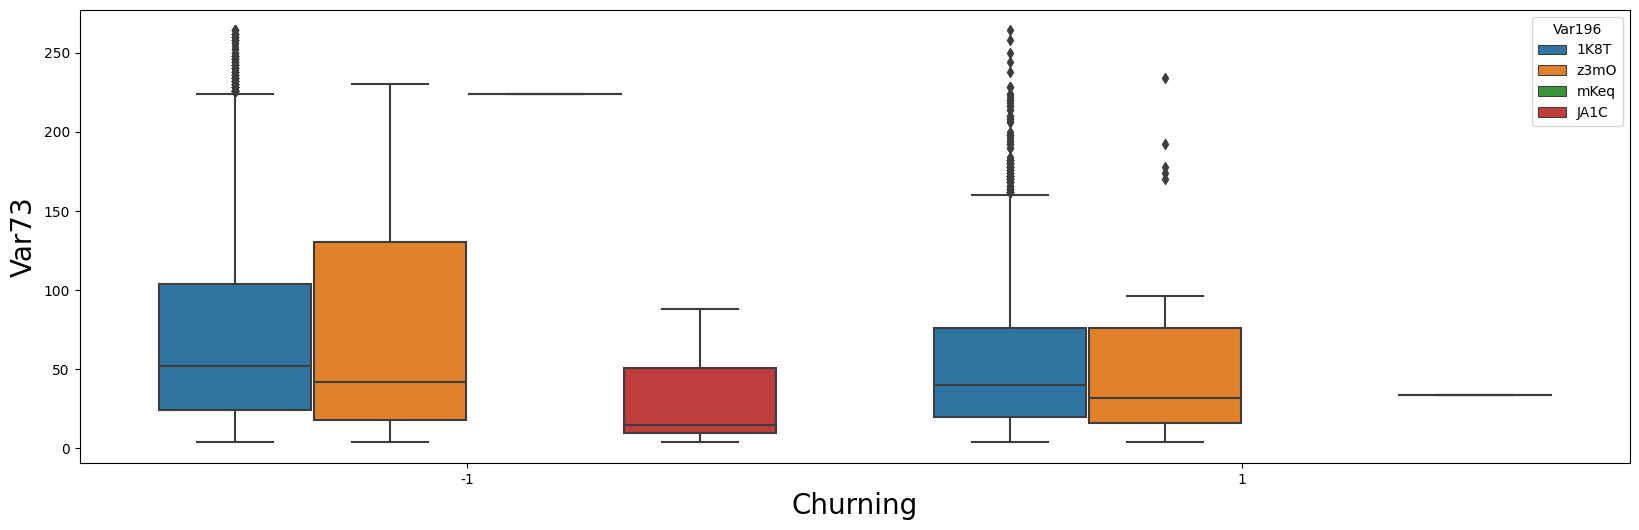

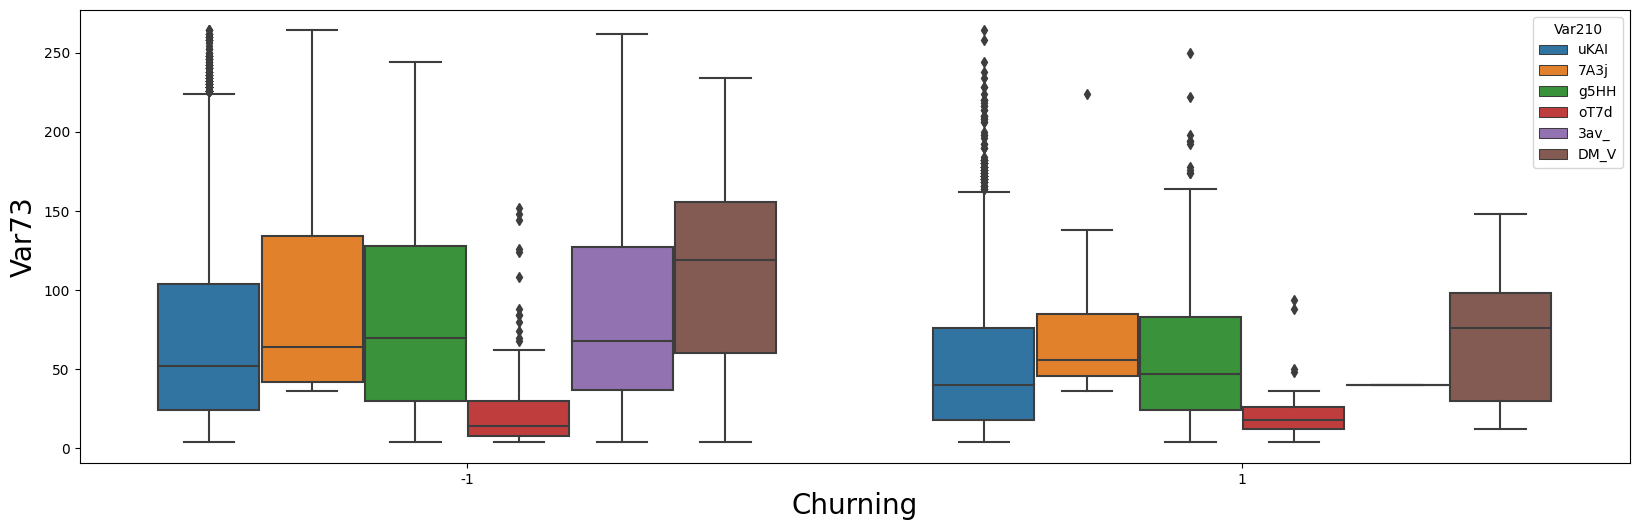

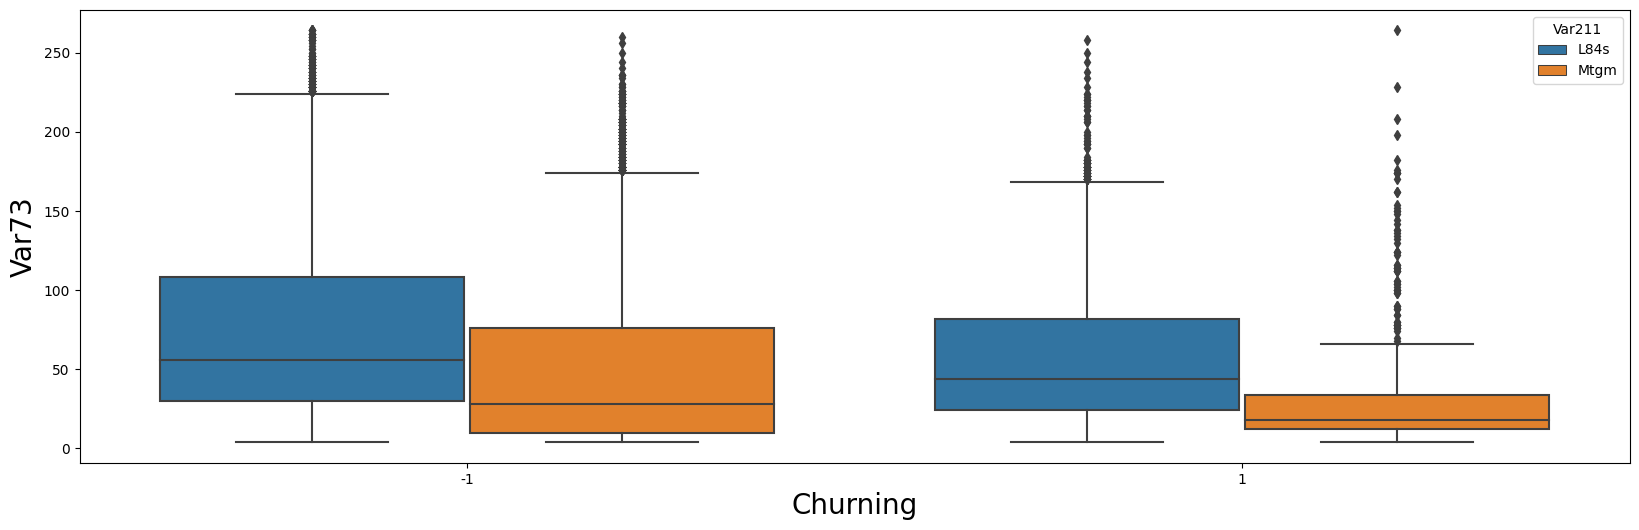

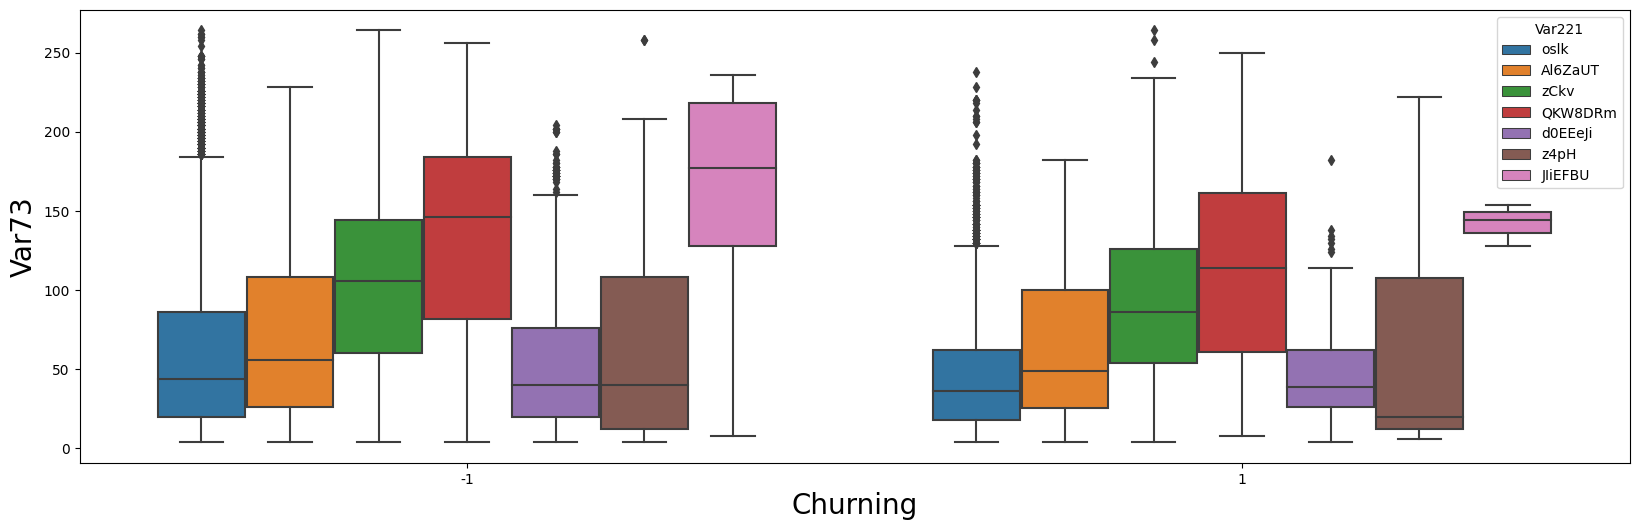

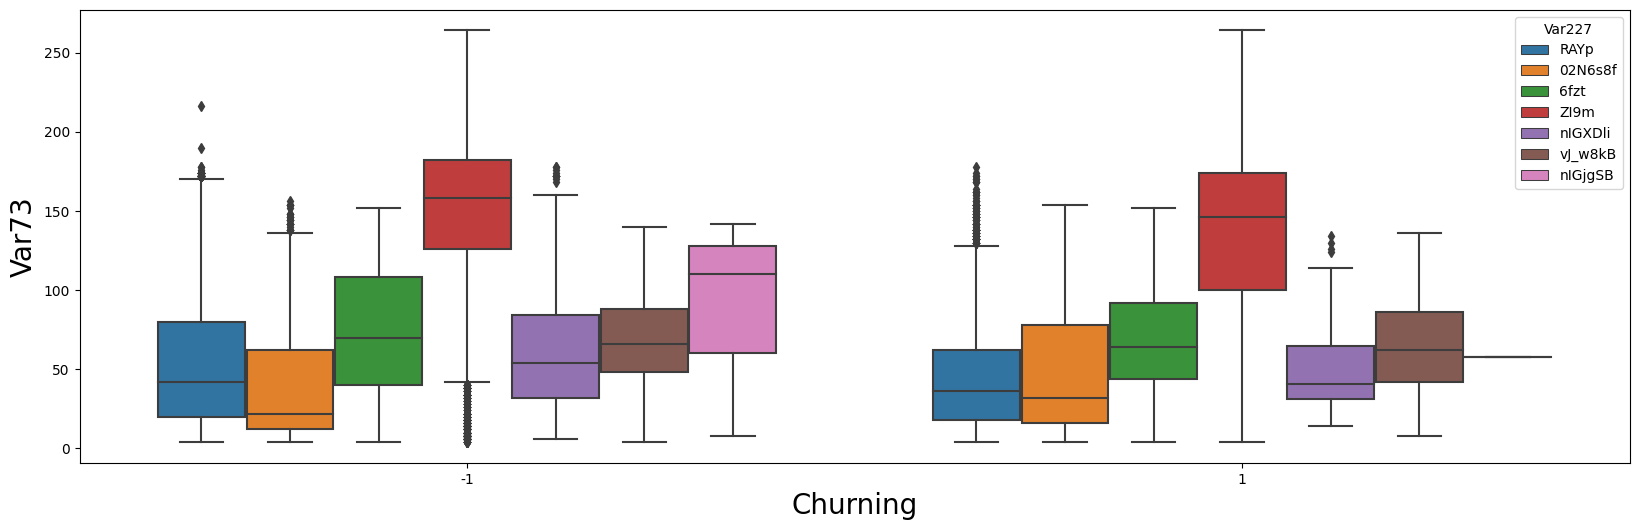

In [11]:
temp = []

#storing those features which has less than 10 unique varibles in the column
for i in cat_var:
    if len(data_train[i].unique())<10:
        temp.append(i)
# the below code snippet shows the distribution of each variable in the features group by churn label
# comparing var73 which is our numerical features.
for col in temp:
    plt.figure(figsize = (20,20))
    plt.subplot(3,1,1)
    sns.boxplot(x = data_train['churning'],y = data_train['Var73'],hue =data_train[col])
    plt.xlabel("Churning",fontsize = 20)
    plt.ylabel("Var73",fontsize = 20)




The above plots shows the boxplot of Unique Variables in Features w.r.t Var73 and group by churning labels.

This EDA was done to obeserved how well the variables are distributed w.r.t feature Var73 and can we distinguish label -1 and 1 by looking at this variables.

But by looking at boxplot hardly we can say anything as many of variable for both class label -1 and 1 have high proportion of collision.

And also there are some variable in features which are only present for class label -1 and not for 1.

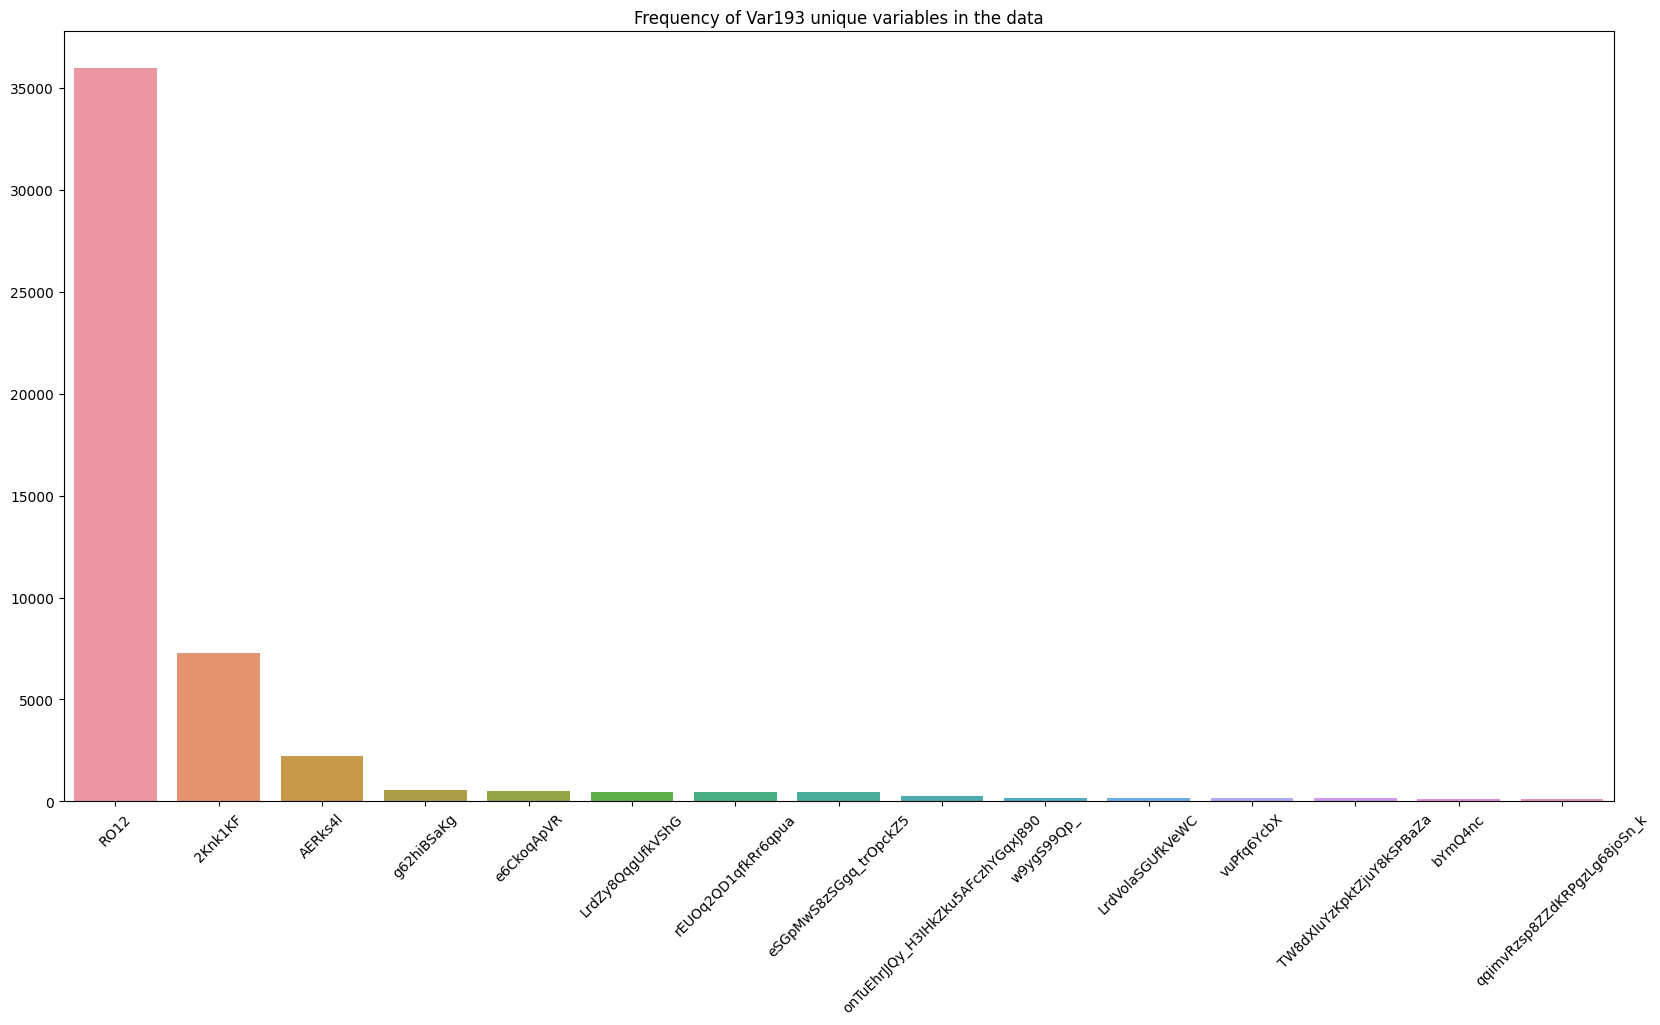

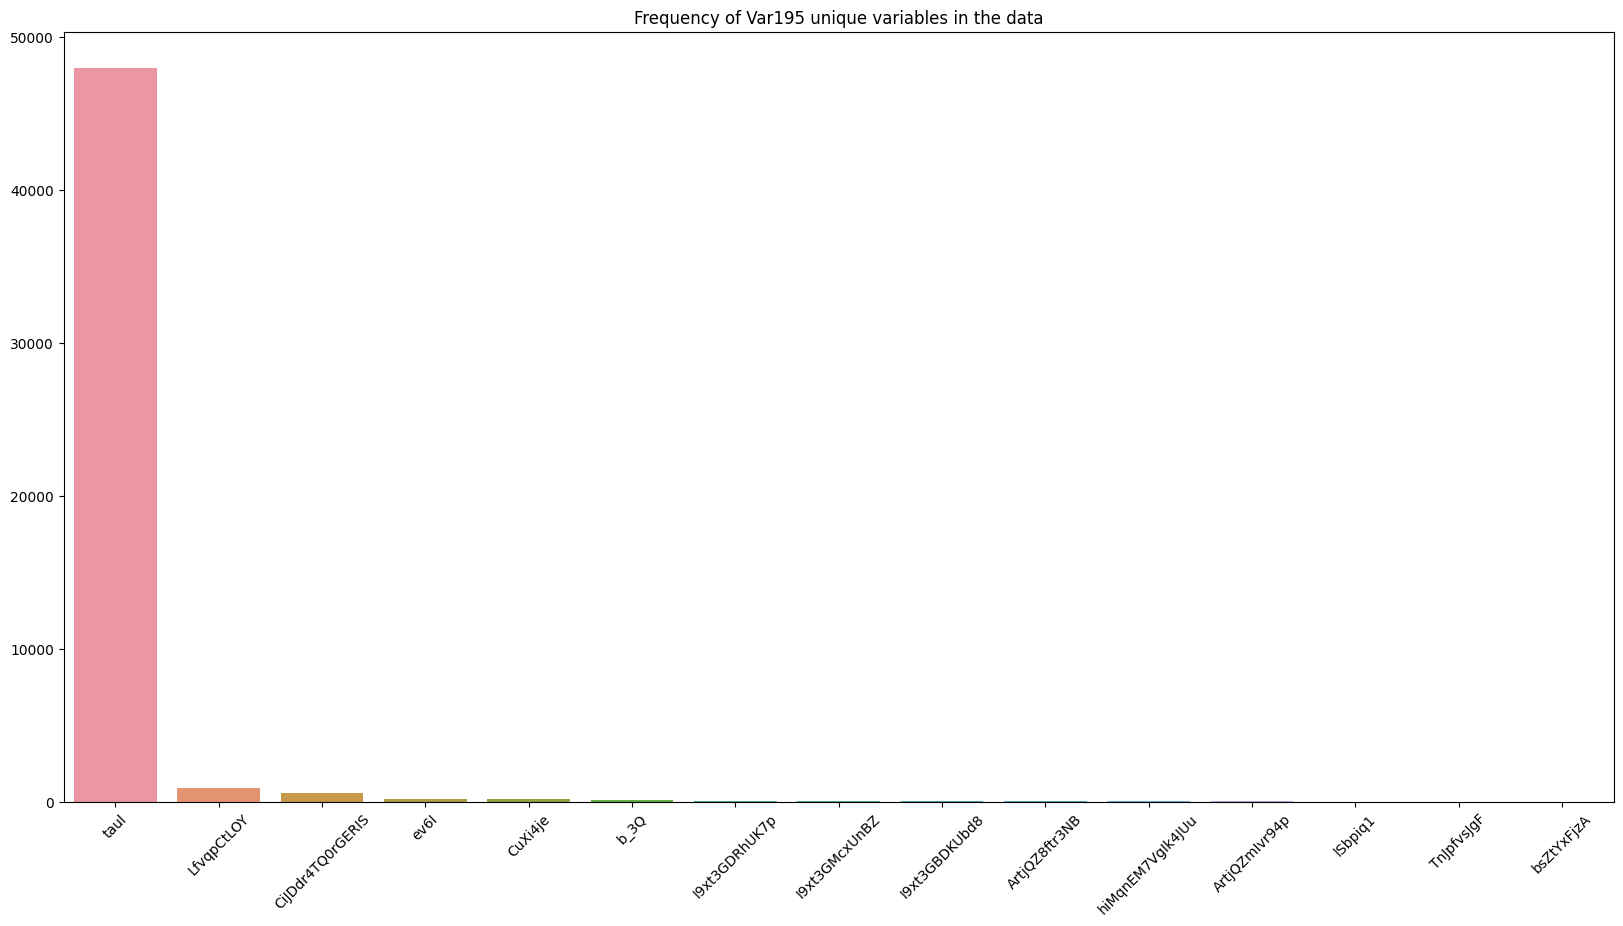

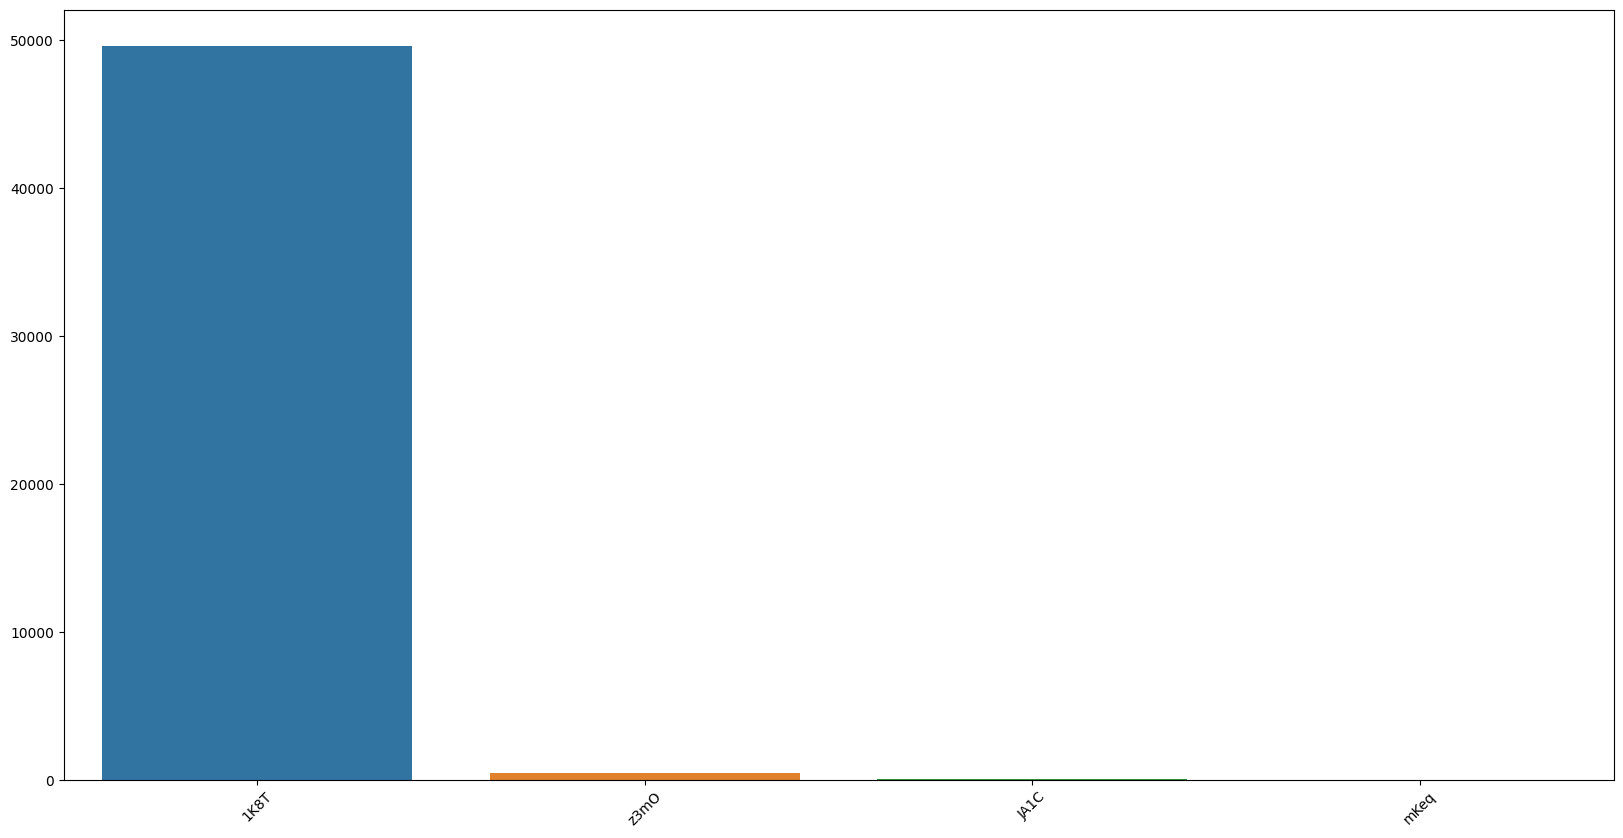

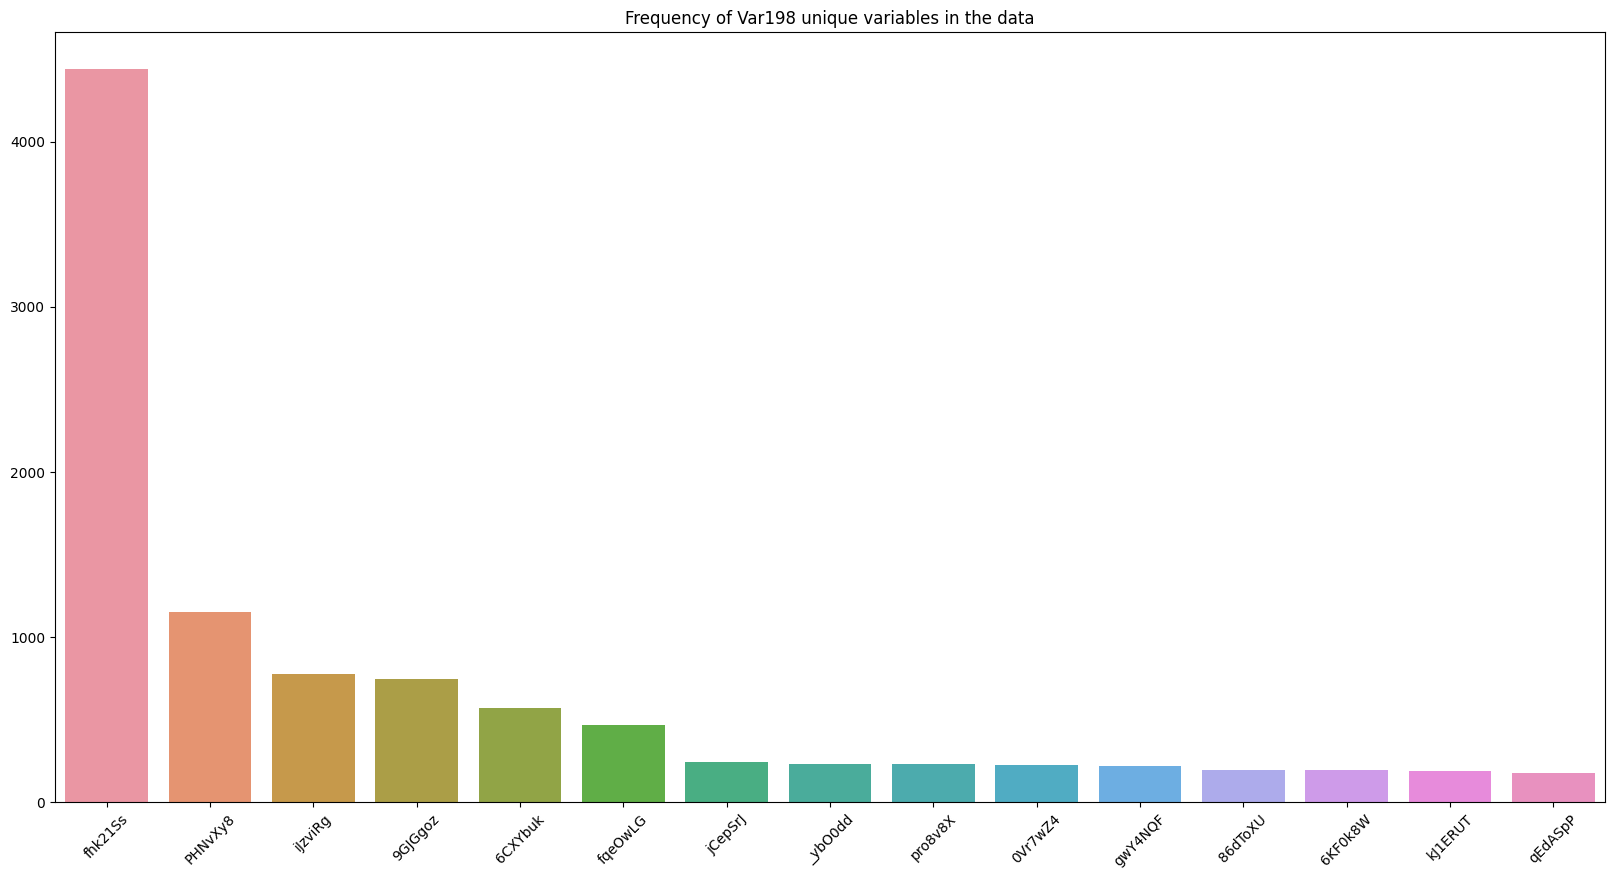

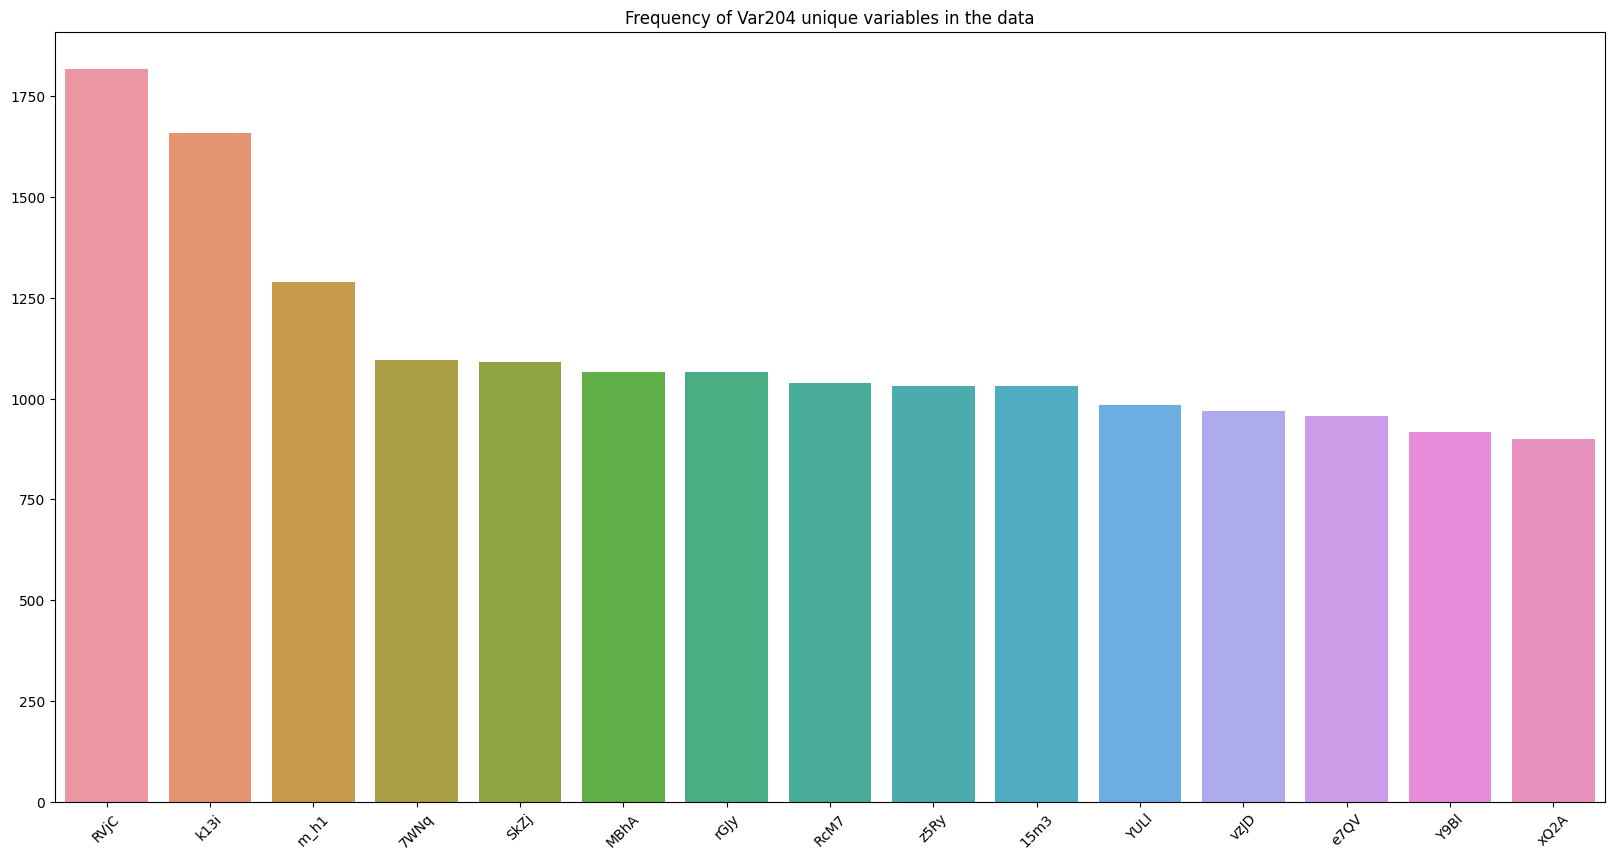

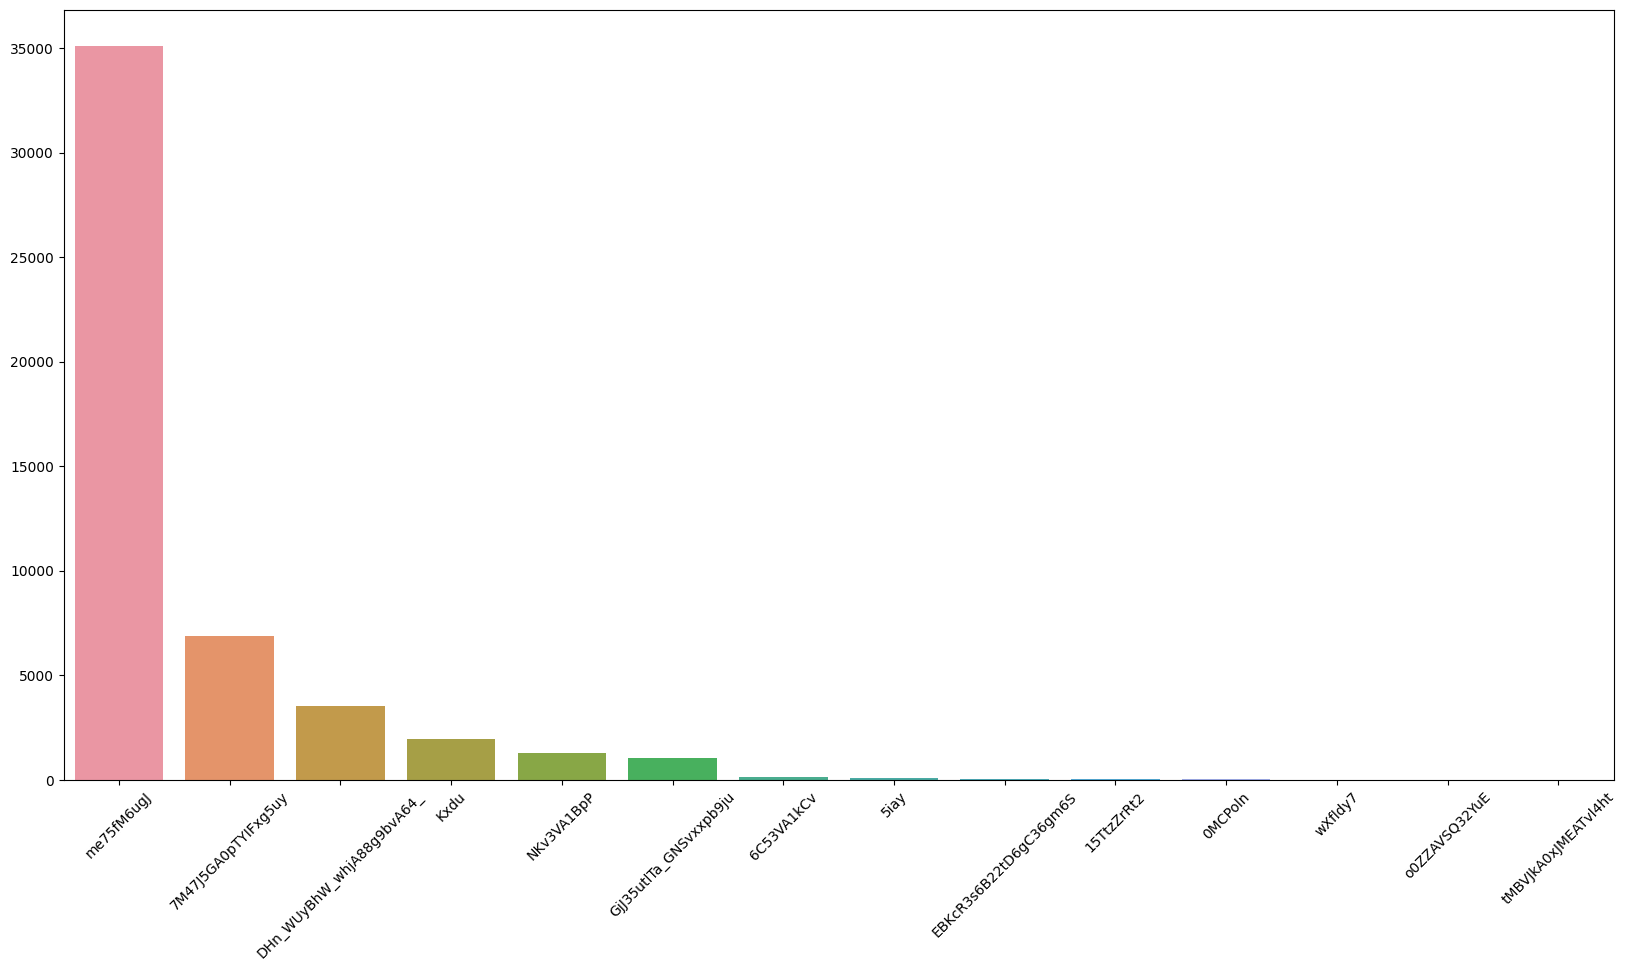

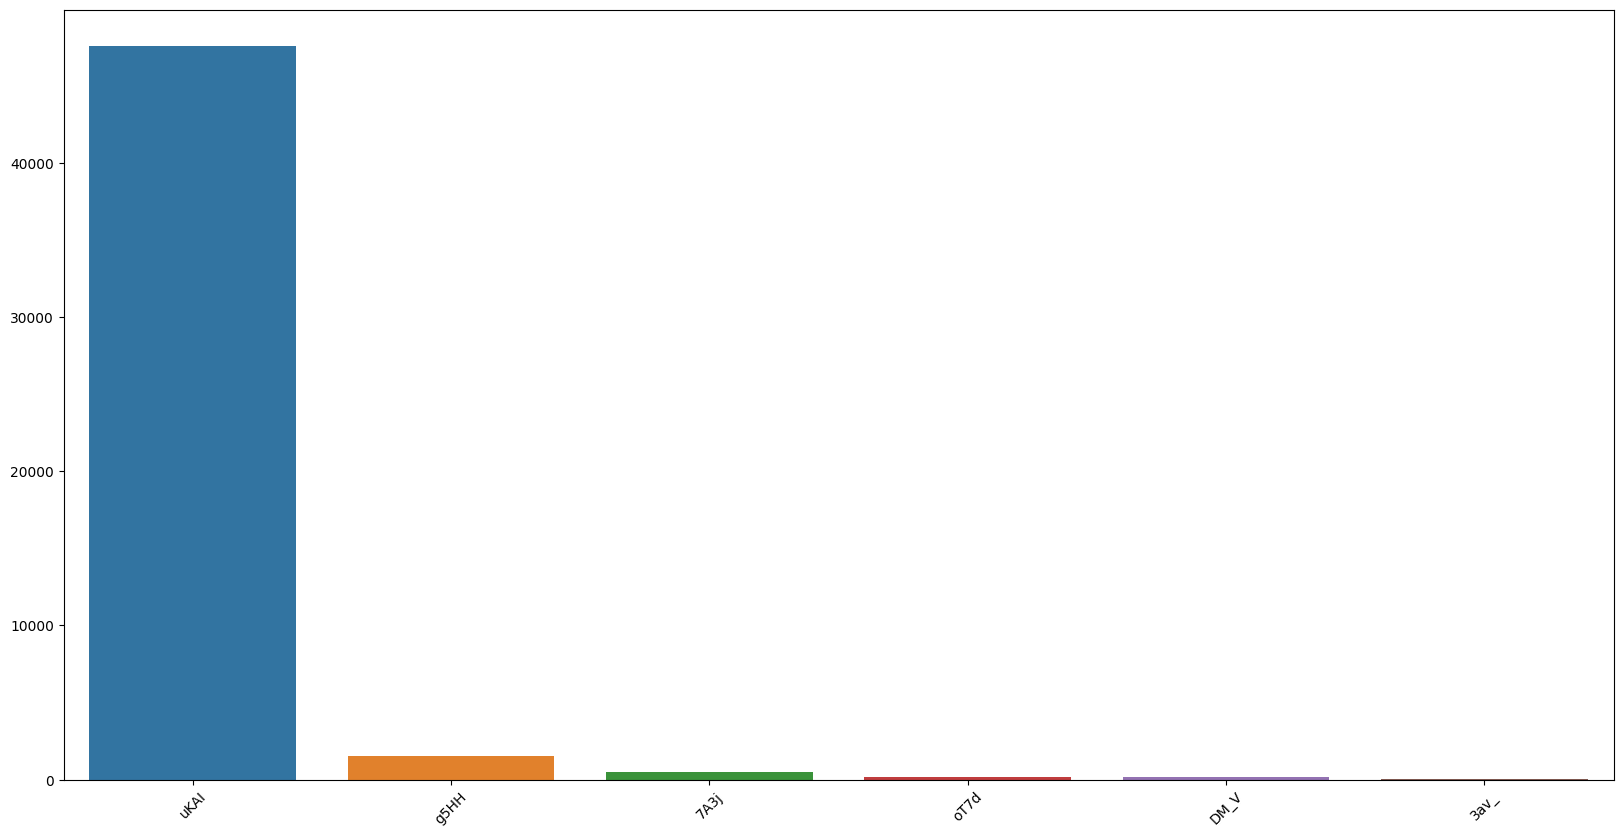

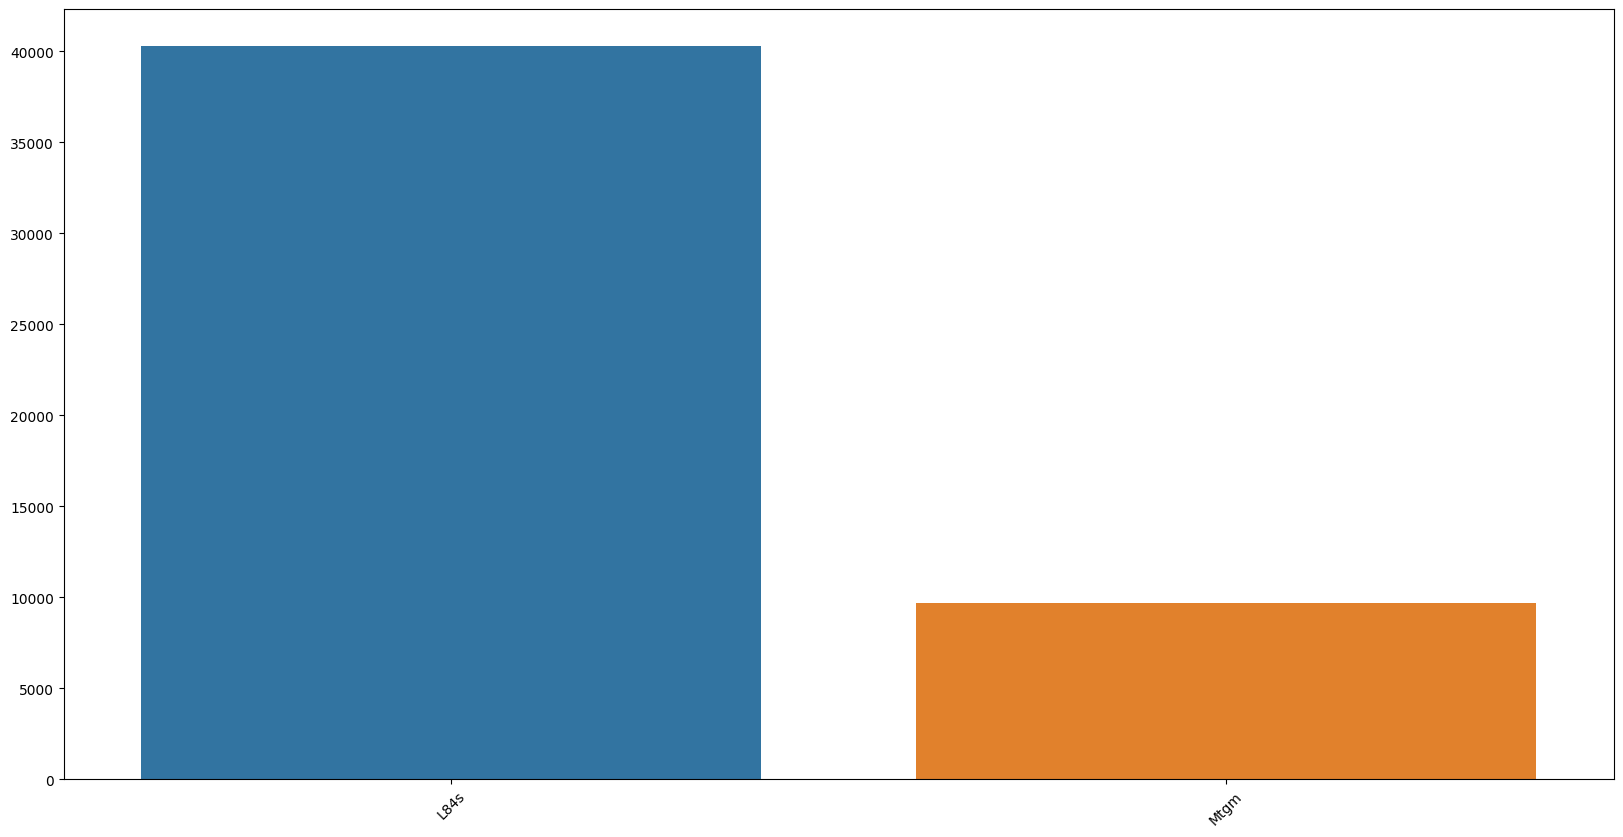

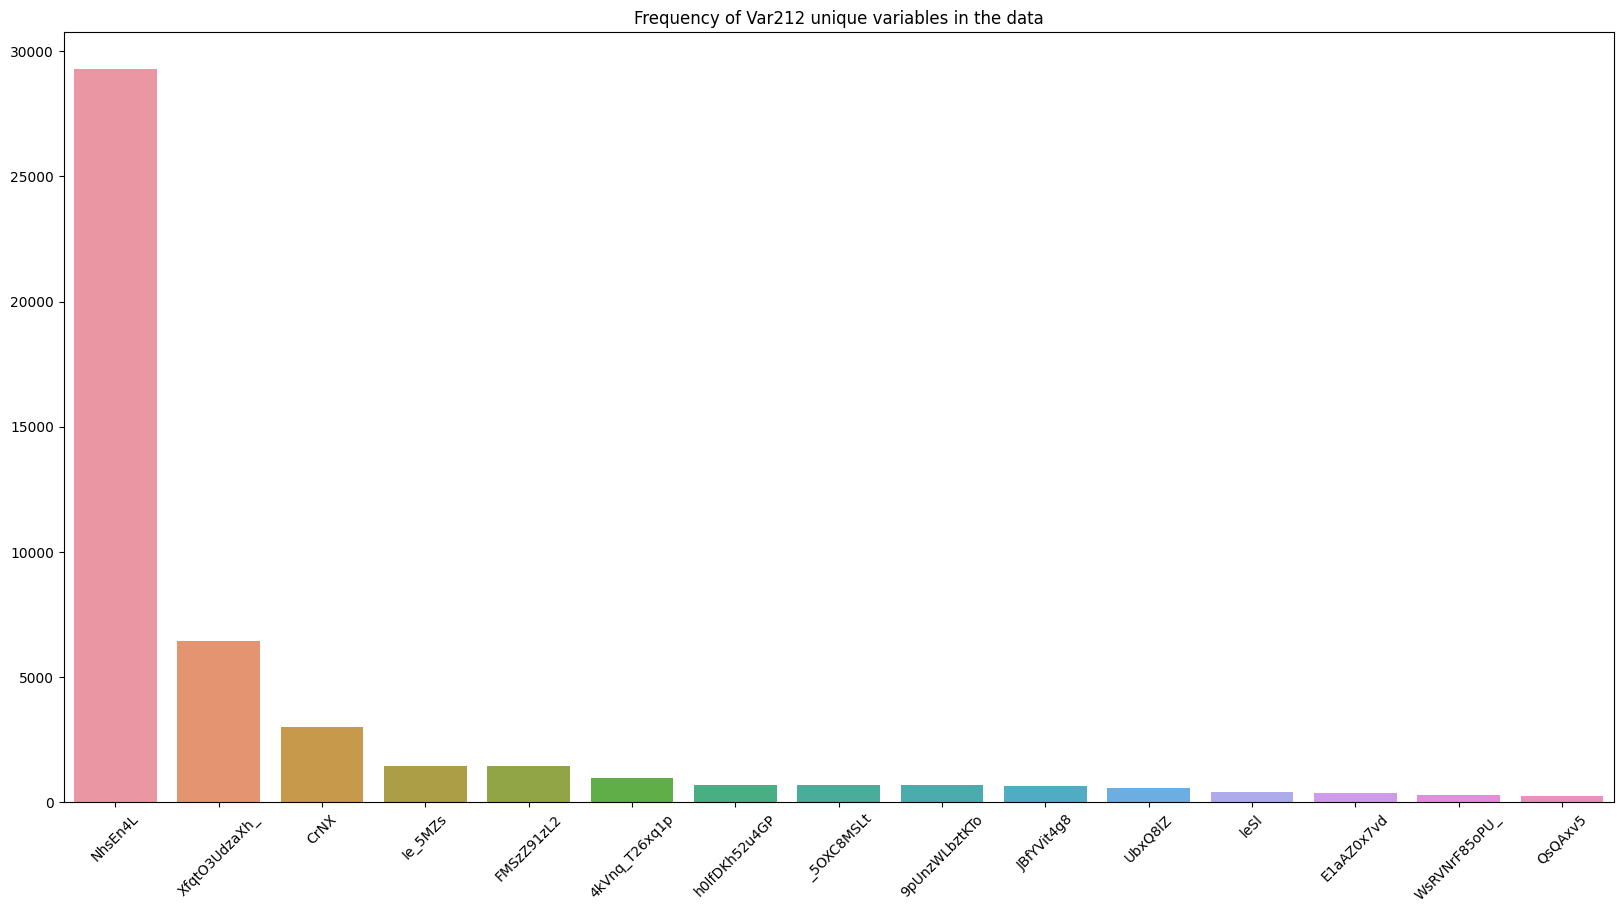

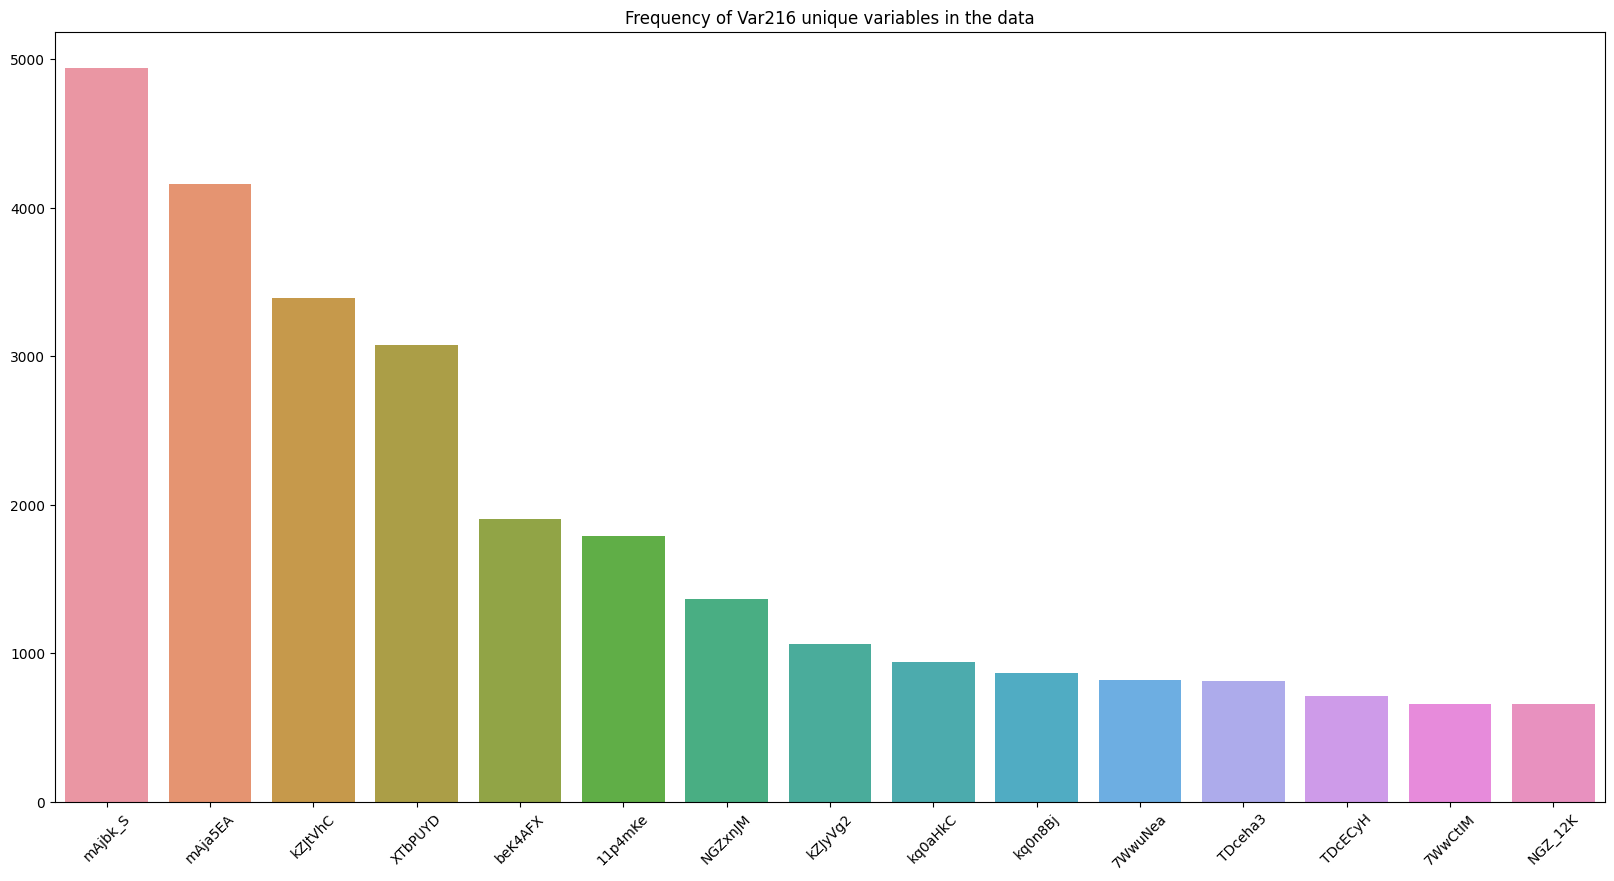

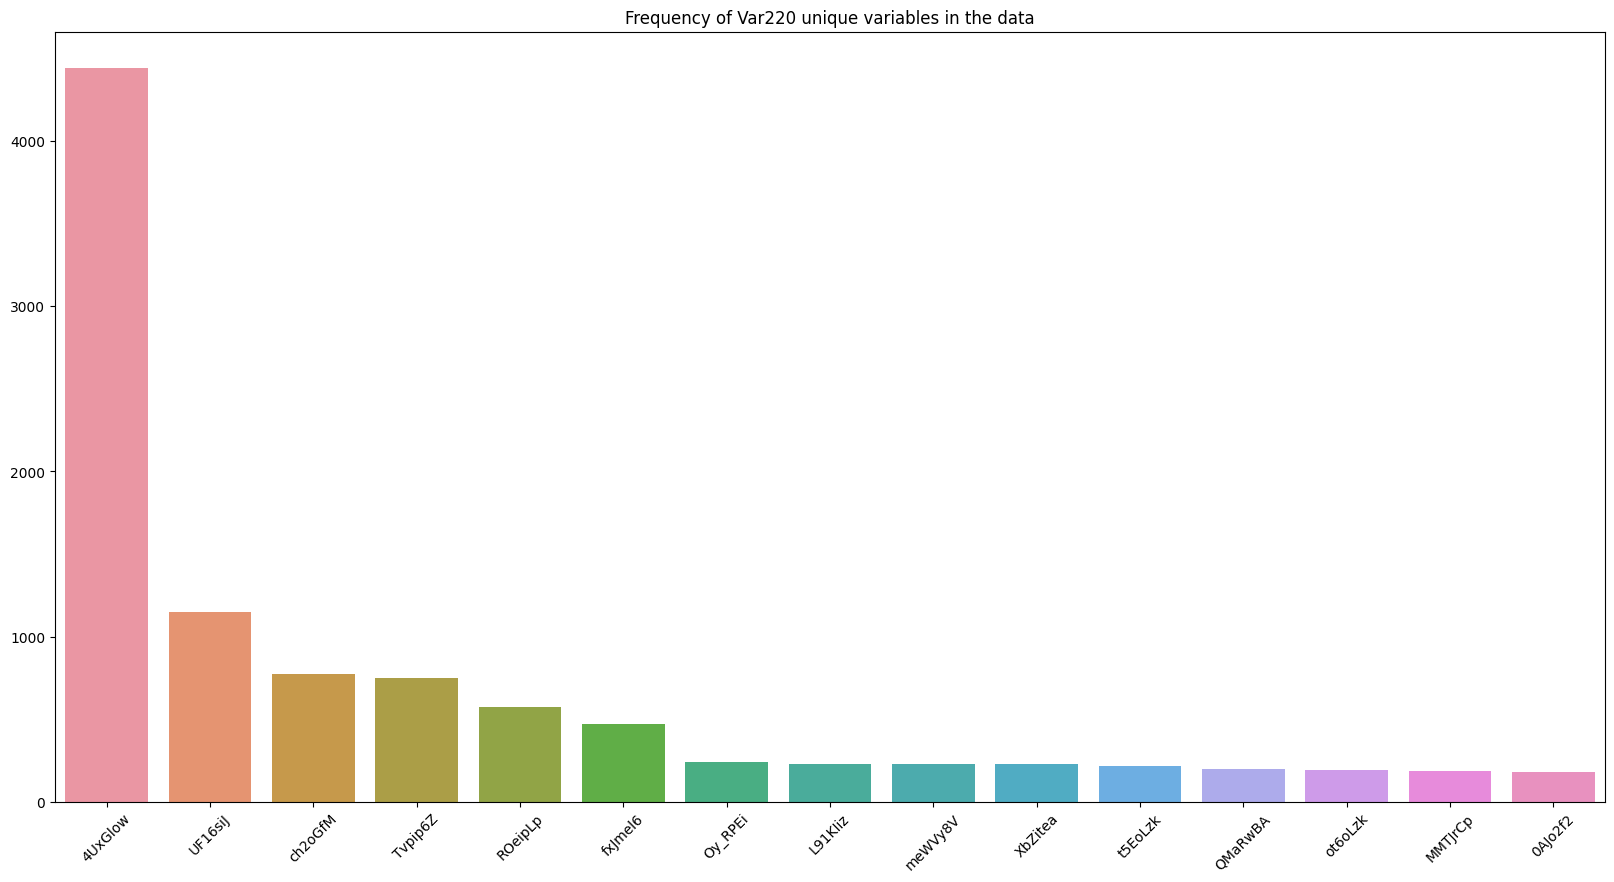

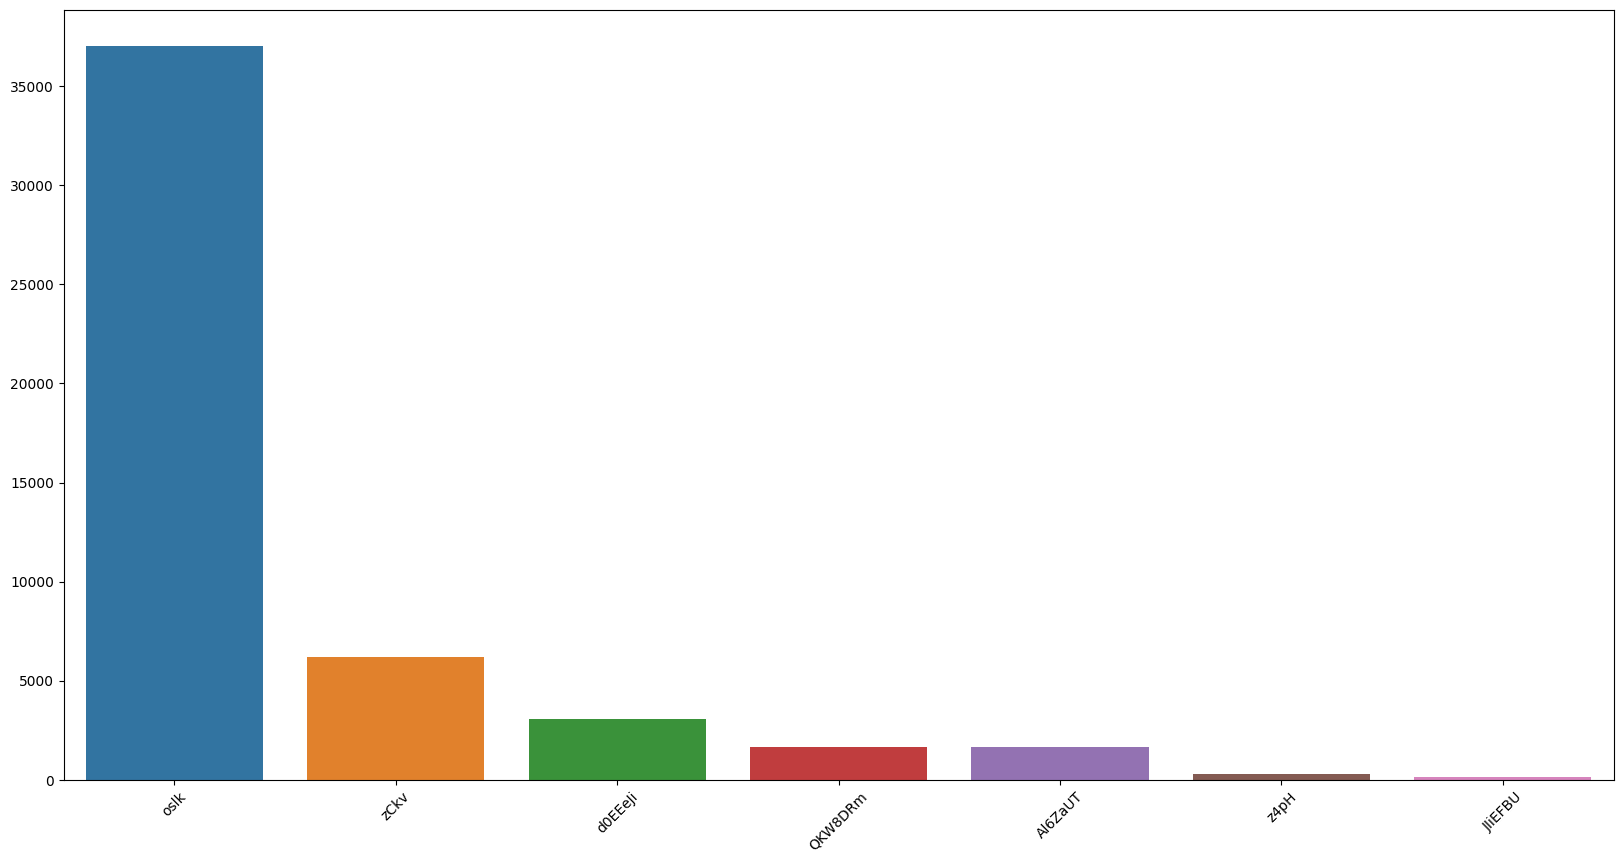

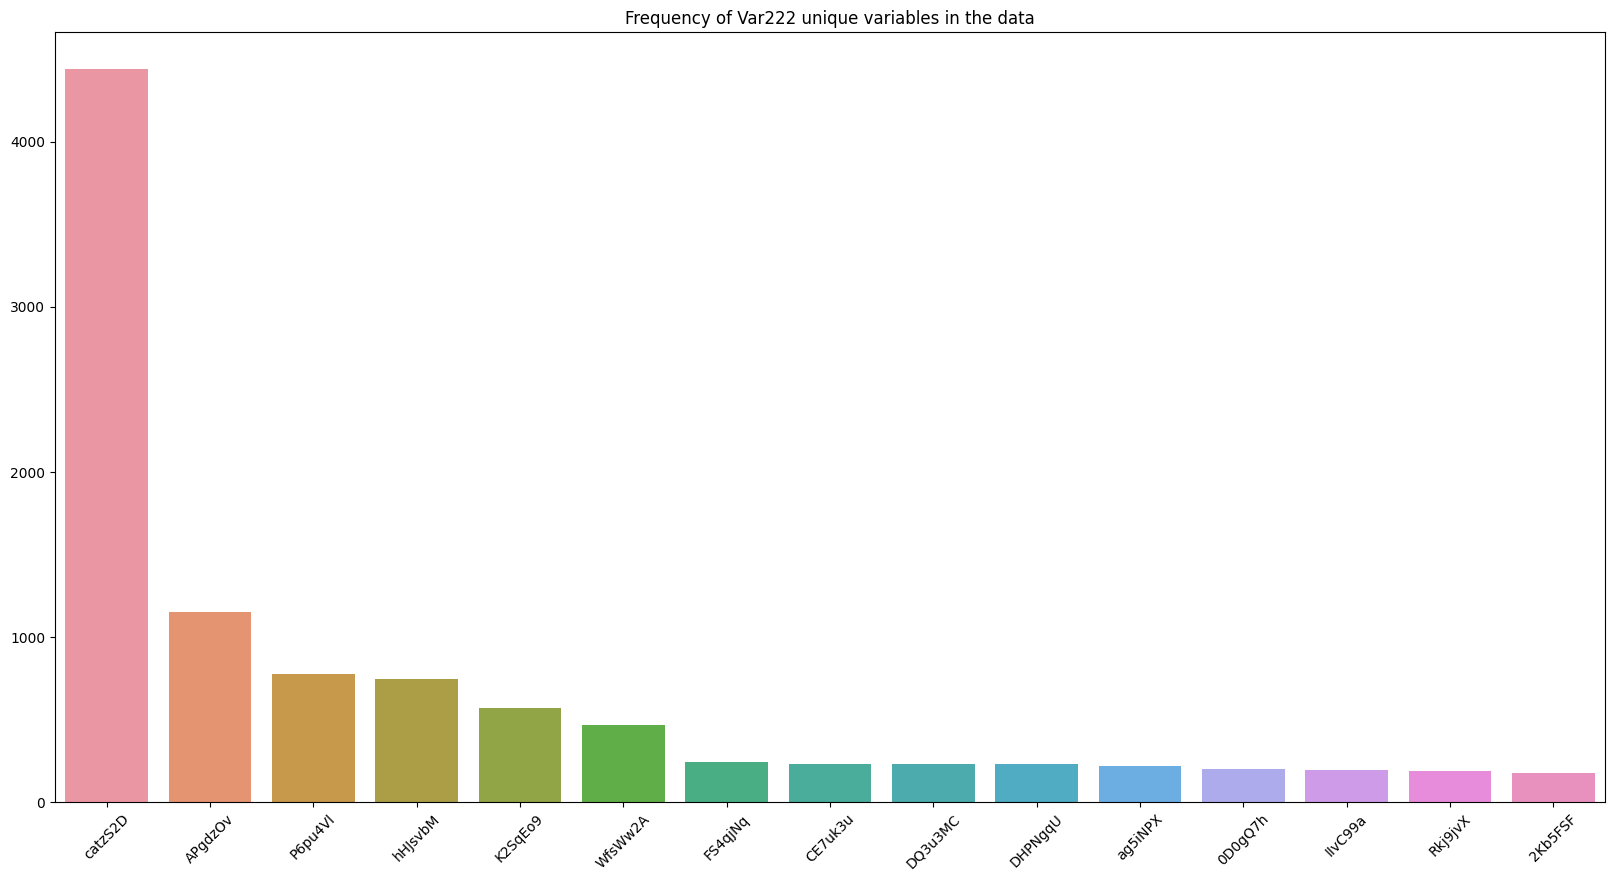

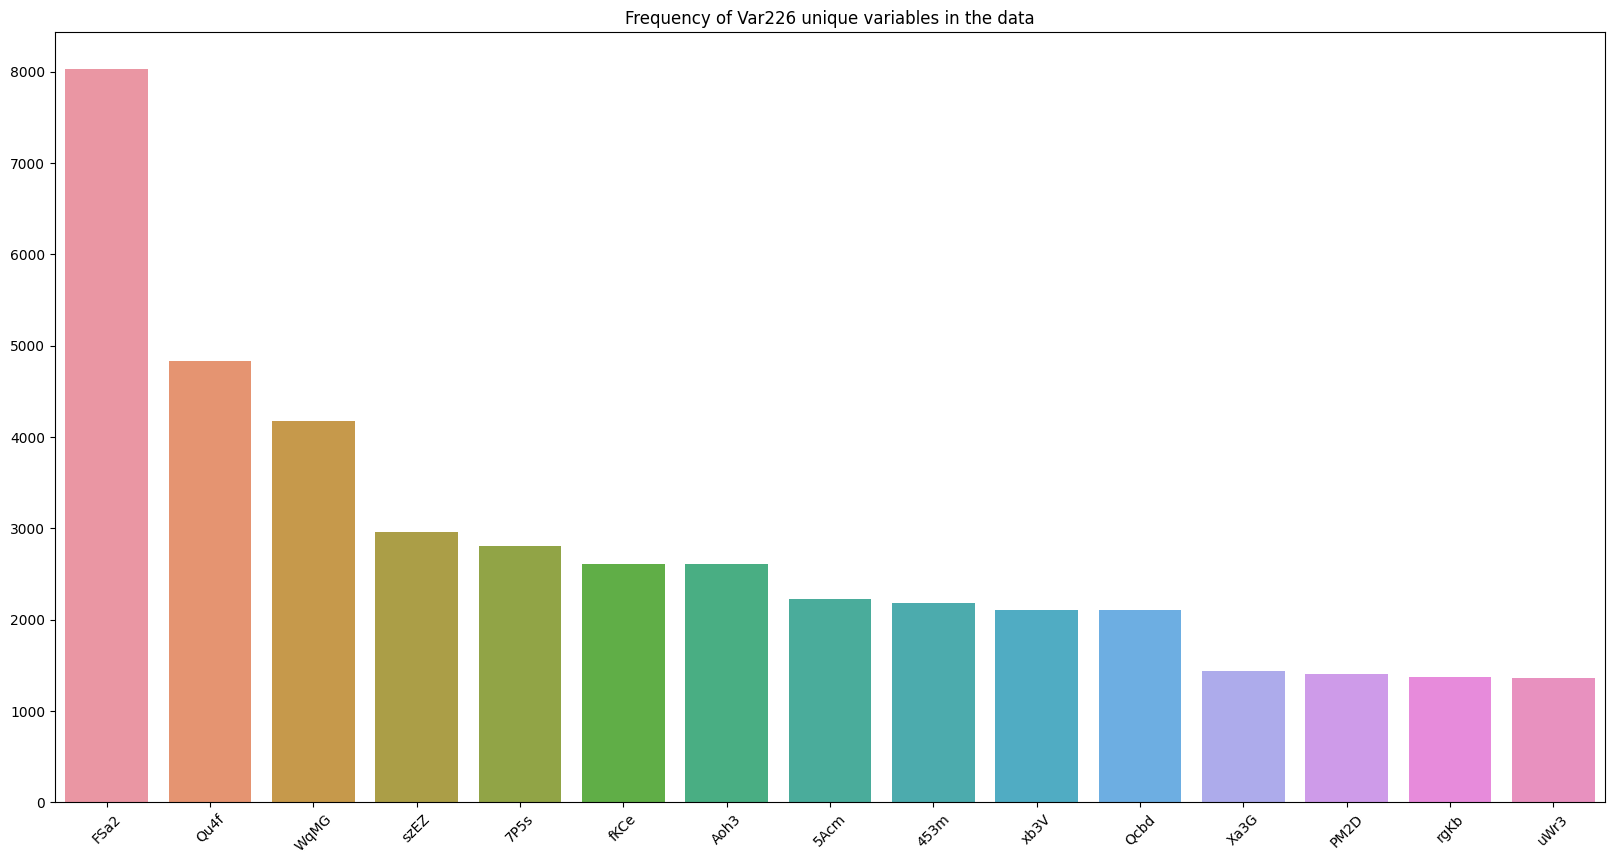

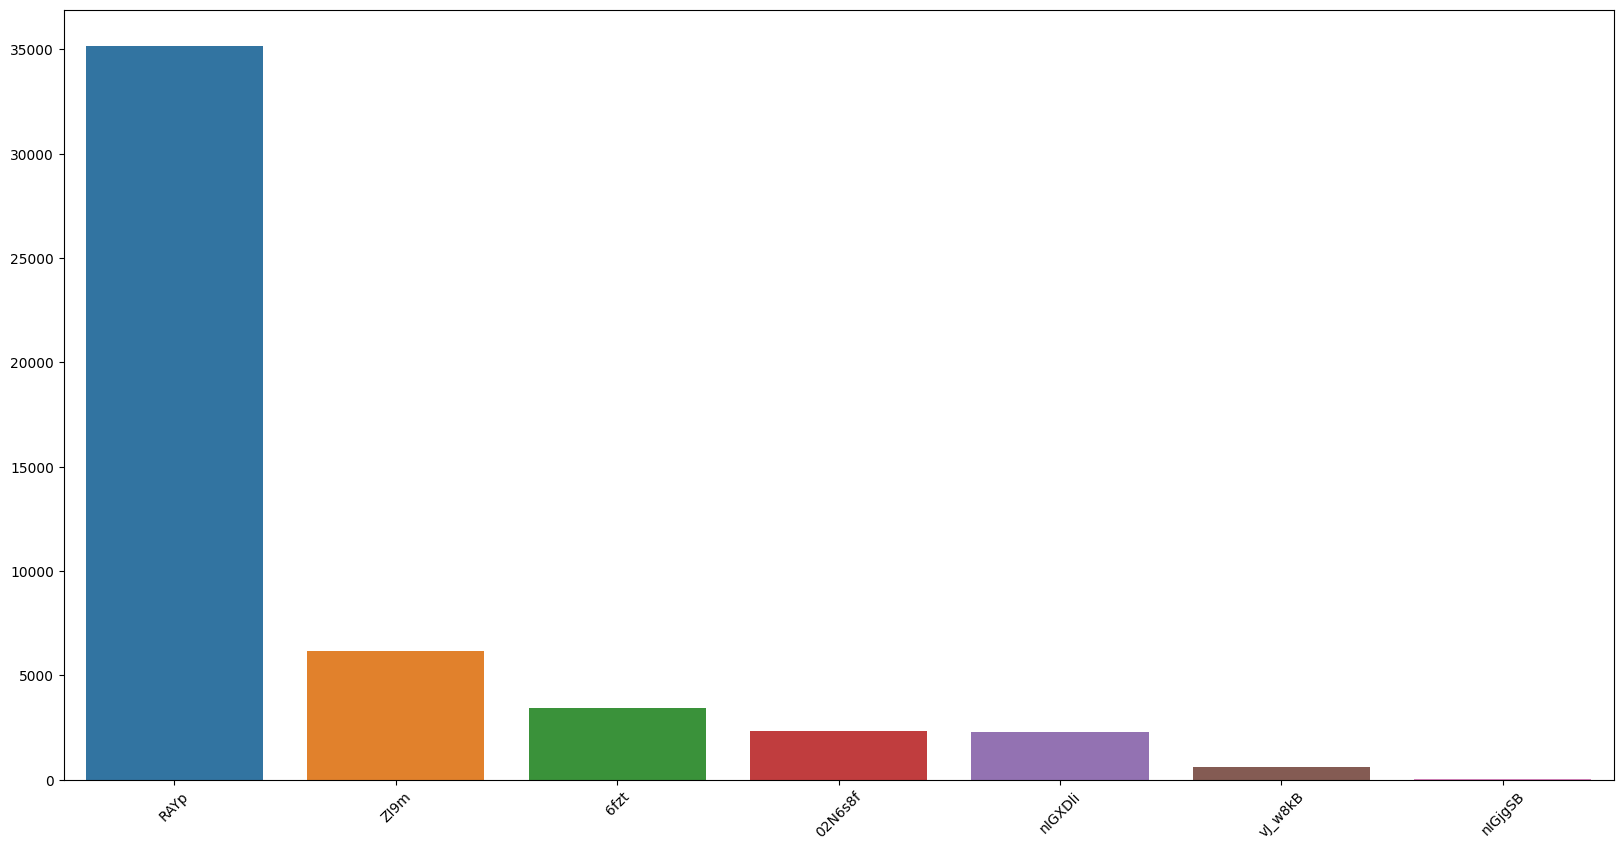

In [12]:
# variable frequency distribution in each features.
for col in cat_var:
    # iterating over categorical variable.
    plt.figure(figsize=(20,10))
    if len(data_train[col].unique())>15:
        sns.barplot(x = data_train[col].value_counts().keys().tolist()[:15],y = data_train[col].value_counts().values.tolist()[:15])
        plt.xticks(rotation = 45)
        plt.title("Frequency of "+col+" unique variables in the data")
    else:
        sns.barplot(x = data_train[col].value_counts().keys().tolist()[:len(data_train[col].unique())],y = data_train[col].value_counts().values.tolist()[:len(data_train[col].unique())])
        plt.xticks(rotation = 45)


##### we can see that there is alot of variables that contains nan values more than 40k ,  we will deal with those nan later.

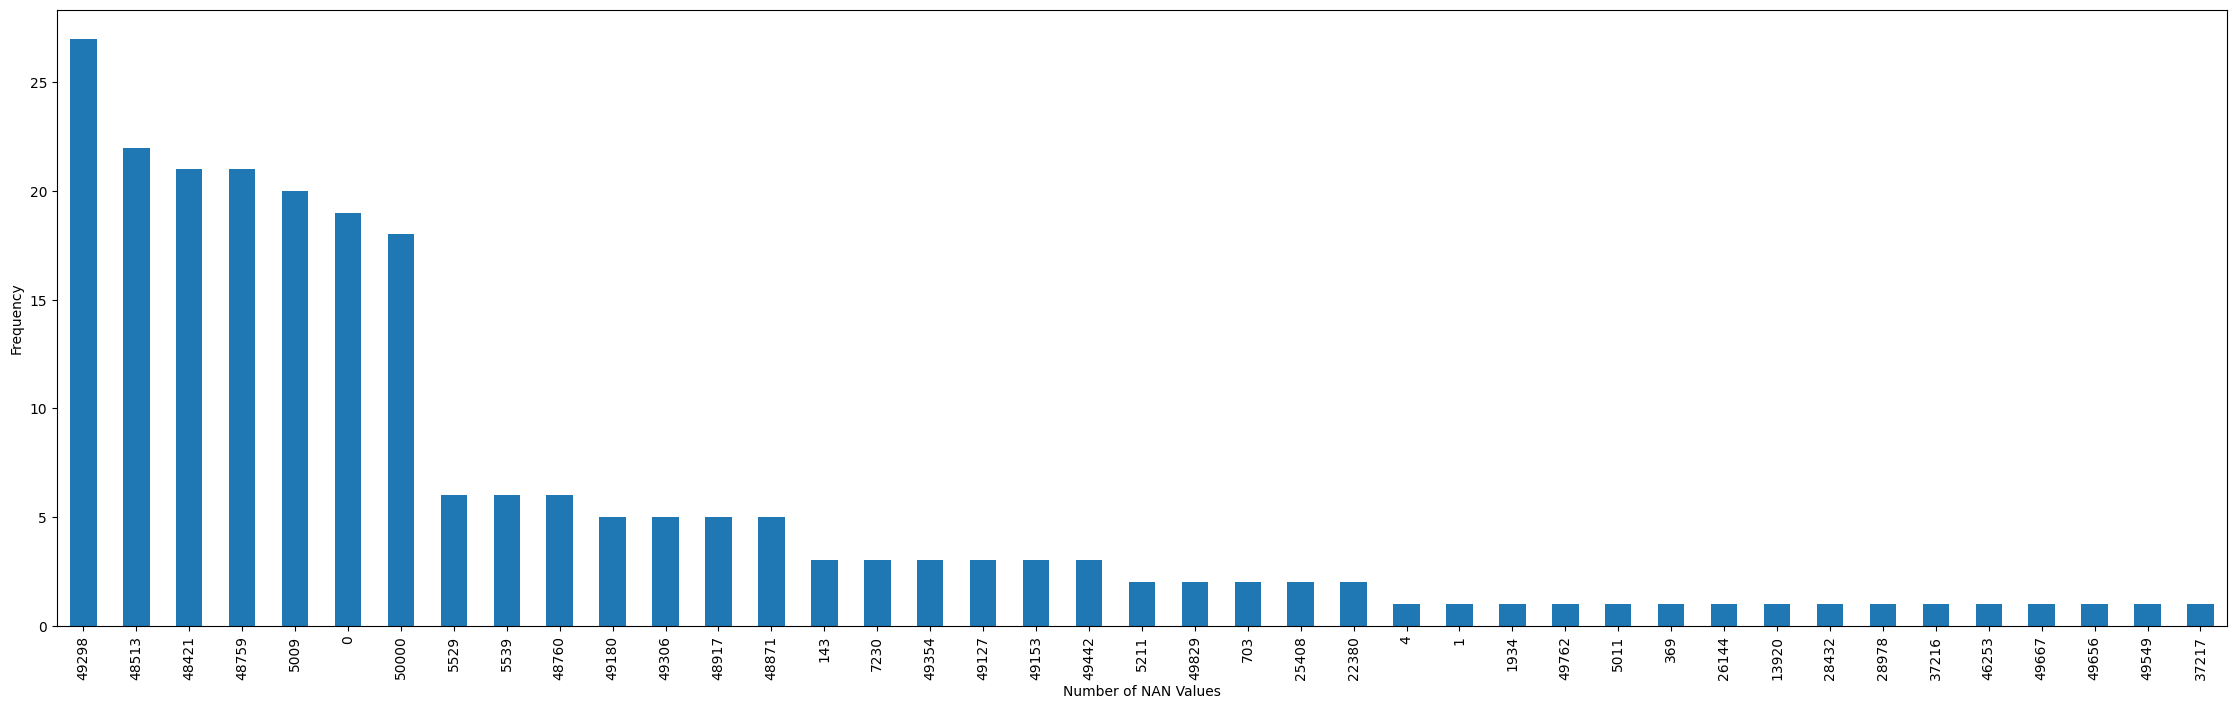

In [13]:
plt.figure(figsize = (28,8))
na_val_sorted['Total NA values'].value_counts()[:50].plot(kind='bar')
plt.xlabel("Number of NAN Values")
plt.ylabel("Frequency")
plt.show()


## Distribution of  target


Text(0.5, 1.0, 'Churning')

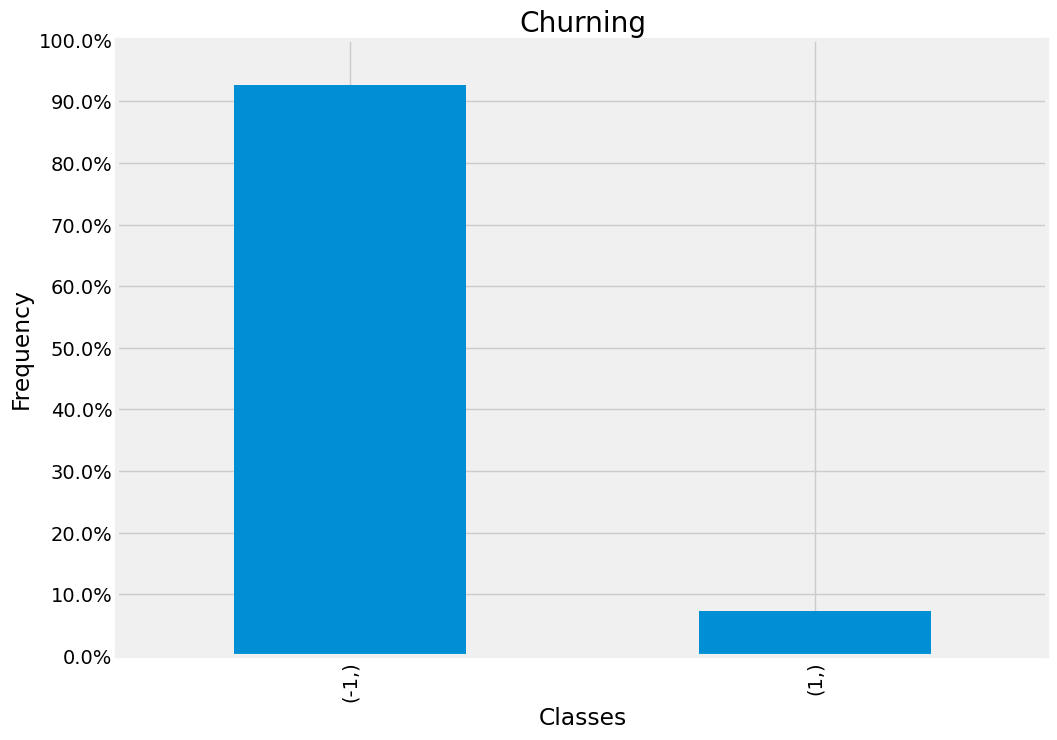

In [14]:
plt.figure(figsize = (12,8))
plt.style.use('fivethirtyeight')

# plt.style.use('fivethirtyeight')
ax = churn.value_counts().plot.bar()
total=50000

ax.yaxis.set_ticks(np.linspace(0, total, 11)) 
ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))

plt.xlabel("Classes")
plt.ylabel("Frequency")
plt.title("Churning")


as we can see in the distribution that data has highly unbalanced targets

In [15]:
data_train = data_train.drop('churning',axis=1) # Drop churning from train data


## Data Cleaning

##### Dropping features which has only nan values

In [16]:
na_val_sorted["Total NA values"] = na_val_sorted["Total NA values"].map(int)
col_name = list(na_val_sorted[na_val_sorted["Total NA values"]==50000]["Features"])

data_train = data_train.drop(col_name,axis=1) # here we are droping columns having all values as NAN


## removing those column which has more than 70% nan values.


In [17]:

na_val_sorted = na_val_sorted.loc[18:].reset_index()
na_val_sorted.drop(['index'],axis=1,inplace=True)

na_val_sorted["percent_of_nan"] = na_val_sorted["Total NA values"]/50000.0


In [18]:

col_drop = list(na_val_sorted[na_val_sorted["percent_of_nan"]>0.70]["Features"])  # index of columns to be dropped from the data
data_train = data_train.drop(col_drop,axis=1)



In [19]:
# storing catecorical columns and numerical columns to use them in the data cleaning process

all_col= data_train.columns
cat_var,num_var=[],[]
for col in all_col:
    if data_train[col].dtype=='O':
        cat_var.append(col)
    else:
        num_var.append(col)
print("Categorical Variable :",cat_var) # categorical features
print("\n")

print("Numerical Variable :",num_var) # numerical features

Categorical Variable : ['Var192', 'Var193', 'Var195', 'Var196', 'Var197', 'Var198', 'Var199', 'Var200', 'Var202', 'Var203', 'Var204', 'Var205', 'Var206', 'Var207', 'Var208', 'Var210', 'Var211', 'Var212', 'Var214', 'Var216', 'Var217', 'Var218', 'Var219', 'Var220', 'Var221', 'Var222', 'Var223', 'Var225', 'Var226', 'Var227', 'Var228', 'Var229']


Numerical Variable : ['Var6', 'Var7', 'Var13', 'Var21', 'Var22', 'Var24', 'Var25', 'Var28', 'Var35', 'Var38', 'Var44', 'Var57', 'Var65', 'Var72', 'Var73', 'Var74', 'Var76', 'Var78', 'Var81', 'Var83', 'Var85', 'Var94', 'Var109', 'Var112', 'Var113', 'Var119', 'Var123', 'Var125', 'Var126', 'Var132', 'Var133', 'Var134', 'Var140', 'Var143', 'Var144', 'Var149', 'Var153', 'Var160', 'Var163', 'Var173', 'Var181', 'Var189']


In [20]:

data_train.head(5)

,Var6,Var7,Var13,Var21,Var22,Var24,Var25,Var28,Var35,Var38,...,Var219,Var220,Var221,Var222,Var223,Var225,Var226,Var227,Var228,Var229
0,1526.0,7.0,184.0,464.0,580.0,14.0,128.0,166.56,0.0,3570.0,...,FzaX,1YVfGrO,oslk,fXVEsaq,jySVZNlOJy,NaN,xb3V,RAYp,F2FyR07IdsN7I,NaN
1,525.0,0.0,0.0,168.0,210.0,2.0,24.0,353.52,0.0,4764966.0,...,FzaX,0AJo2f2,oslk,2Kb5FSF,LM8l689qOp,NaN,fKCe,RAYp,F2FyR07IdsN7I,NaN
2,5236.0,7.0,904.0,1212.0,1515.0,26.0,816.0,220.08,0.0,5883894.0,...,FzaX,JFM1BiF,Al6ZaUT,NKv4yOc,jySVZNlOJy,kG3k,Qu4f,02N6s8f,ib5G6X1eUxUn6,am7c
3,NaN,0.0,0.0,NaN,0.0,NaN,0.0,22.08,0.0,0.0,...,FzaX,L91KIiz,oslk,CE7uk3u,LM8l689qOp,NaN,FSa2,RAYp,F2FyR07IdsN7I,NaN
4,1029.0,7.0,3216.0,64.0,80.0,4.0,64.0,200.00,0.0,0.0,...,FzaX,OrnLfvc,oslk,1J2cvxe,LM8l689qOp,kG3k,FSa2,RAYp,F2FyR07IdsN7I,mj86


## Dealing with  NaN values in categorical data.



### Filling Nan values with different string


In [21]:

# for each categorical data types features we consider NaNs values as a seperate group.

for col in cat_var:
    data_train[col] = pd.Series(np.where(data_train[col].isnull(),"Others",data_train[col].values)).tolist()



## Encoding Top 7 Values Of Each Features

In [22]:
# taking top 7 variables of each categorical features and encoding them.Later we will also do frequency enoding to replace categorical features.
temp = data_train.copy()
for col in cat_var:
    for var in list(dict(temp[col].value_counts()[:7]).keys()):
        data_train[col+"_"+var] = list(np.where(data_train[col].str.contains(var),1,0)) # this where function works like if else if condition satified it give value as 1 else 0



In [23]:
data_train.head()

,Var6,Var7,Var13,Var21,Var22,Var24,Var25,Var28,Var35,Var38,...,Var228_ib5G6X1eUxUn6,Var228_R4y5gQQWY8OodqDV,Var228_xwM2aC7IdeMC0,Var228_TCU50_Yjmm6GIBZ0lL_,Var228_iyHGyLCEkQ,Var229_Others,Var229_am7c,Var229_mj86,Var229_sk2h,Var229_oJmt
0,1526.0,7.0,184.0,464.0,580.0,14.0,128.0,166.56,0.0,3570.0,...,0,0,0,0,0,1,0,0,0,0
1,525.0,0.0,0.0,168.0,210.0,2.0,24.0,353.52,0.0,4764966.0,...,0,0,0,0,0,1,0,0,0,0
2,5236.0,7.0,904.0,1212.0,1515.0,26.0,816.0,220.08,0.0,5883894.0,...,1,0,0,0,0,0,1,0,0,0
3,NaN,0.0,0.0,NaN,0.0,NaN,0.0,22.08,0.0,0.0,...,0,0,0,0,0,1,0,0,0,0
4,1029.0,7.0,3216.0,64.0,80.0,4.0,64.0,200.00,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0


### Frequency Encoding

In [24]:

 # this frequency encoding replacing each categorical variables with there number of occurence in the 
                            # features and later normalizing it.

temp_df = data_train.copy()
for col in cat_var:
    value = dict(data_train[col].value_counts()) # having value counts data from training data only
    data = []
    for val in temp_df[col].values: 
        if val not in list(value.keys()):
            data.append(1) # if certain variable is not present in test data then append that 1 for that new variable.
        else:
            data.append(value[val])
    temp_df[col] = data
    
data_train = temp_df


## Dealing with  NaN values in numerical  data.


In [25]:

# the below code snippet filling na values 
# we are storing train data in temp_df because temp_df variable will be used to calculate mean and we can't use test data for 
# mean calculation as it will data leakage problem.

for col in num_var:
    data_train[col].fillna(temp_df[col].mean(),inplace = True)



## Now we are normalizing using min-max scaling


In [26]:
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler() # we are doing min max scaling to ensure all values lie between 0 and 1
X = minmax.fit_transform(data_train)


In [27]:
X.shape

(50000, 270)

In [28]:
churn.shape

(50000, 1)

## Splitting the dataset into train and test

In [35]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,churn,test_size=0.2,random_state=112,stratify = churn)


## Model Training


In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score,classification_report,accuracy_score


In [218]:
model_churn = RandomForestClassifier(random_state=112,n_jobs=-1,warm_start=True)
param = {"n_estimators":[100,200,400,500]
         ,"max_depth":[3,4,5],"min_samples_split":[2,5,10,30]}
clf_churn = GridSearchCV(model_churn,param_grid=param,scoring="roc_auc",n_jobs=-1,return_train_score=True,verbose=1)
clf_churn.fit(X_train,y_train)


Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(estimator=RandomForestClassifier(n_jobs=-1, random_state=112,
                                              warm_start=True),
             n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5],
                         'min_samples_split': [2, 5, 10, 30],
                         'n_estimators': [100, 200, 400, 500]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [225]:
y_pred = clf_churn.predict(X_test) # predicting probability of each class of occurence

print("Accuaracy Score on test data is {}".format(accuracy_score(y_test,y_pred))) # results on test data.


Accuaracy Score on test data is 0.9266


In [228]:
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

          -1       0.93      1.00      0.96      9266
           1       0.00      0.00      0.00       734

    accuracy                           0.93     10000
   macro avg       0.46      0.50      0.48     10000
weighted avg       0.86      0.93      0.89     10000



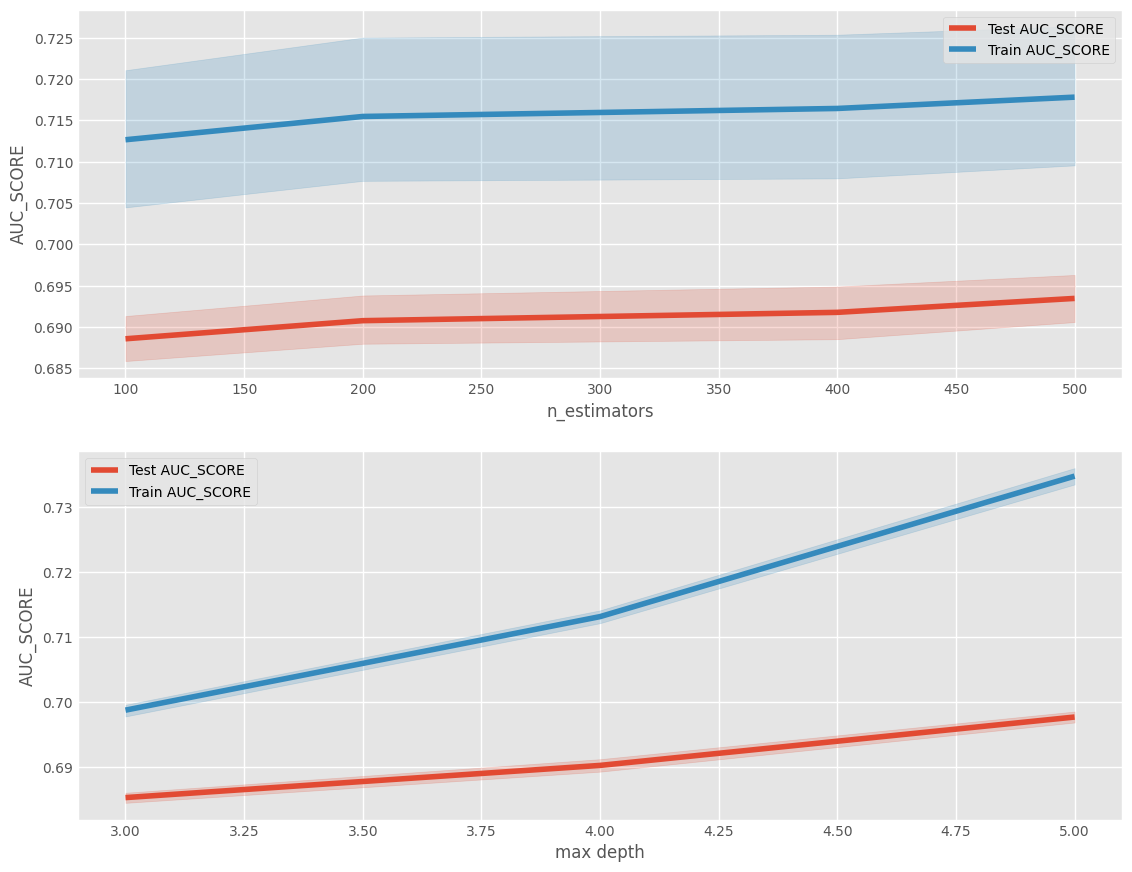

In [223]:

# plotting the test and train score on various paramters values.
# to see whether our model is generalized or not.i.e there should be no overfitting.
plt.style.use("ggplot")
plt.figure(figsize=(12,10))
plt.subplot(2,1,1)
sns.lineplot(x = clf_churn.cv_results_['param_n_estimators'],y=clf_churn.cv_results_['mean_test_score'],label = "Test AUC_SCORE")
sns.lineplot(x = clf_churn.cv_results_['param_n_estimators'],y=clf_churn.cv_results_['mean_train_score'],label = "Train AUC_SCORE")
plt.xlabel("n_estimators")
plt.ylabel("AUC_SCORE")
plt.legend()

plt.subplot(2,1,2)
sns.lineplot(x = clf_churn.cv_results_['param_max_depth'],y=clf_churn.cv_results_['mean_test_score'],label = "Test AUC_SCORE")
sns.lineplot(x = clf_churn.cv_results_['param_max_depth'],y=clf_churn.cv_results_['mean_train_score'],label = "Train AUC_SCORE")
plt.xlabel("max depth")
plt.ylabel("AUC_SCORE")
plt.legend()
plt.show()


In [29]:
from sklearn.feature_selection import SelectKBest, mutual_info_regression

In [31]:
#Select top 15 features based on mutual info regression
selector = SelectKBest(mutual_info_regression, k =5)
selector.fit(data_train, churn)


SelectKBest(k=5,
            score_func=<function mutual_info_regression at 0x000001E1CEB12430>)

In [32]:
best_5 = data_train.columns[selector.get_support()]
best_5


Index(['Var73', 'Var126', 'Var144', 'Var206', 'Var202_85IW'], dtype='object')

In [33]:
X_5 = data_train[best_5]

minmax = MinMaxScaler() # we are doing min max scaling to ensure all values lie between 0 and 1
X_5 = minmax.fit_transform(X_5)


In [37]:
X_train_5,X_test_5,y_train_5,y_test_5 = train_test_split(X_5,churn,test_size=0.2,random_state=112,stratify = churn)


In [38]:
model_churn5 = RandomForestClassifier(random_state=113,n_jobs=-1,warm_start=True)
param = {"n_estimators":[100,200,400,500]
         ,"max_depth":[3,4,5],"min_samples_split":[2,5,10,30]}
clf_churn_5 = GridSearchCV(model_churn5,param_grid=param,scoring="roc_auc",n_jobs=-1,return_train_score=True,verbose=1)
clf_churn_5.fit(X_train_5,y_train_5)


Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(estimator=RandomForestClassifier(n_jobs=-1, random_state=113,
                                              warm_start=True),
             n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5],
                         'min_samples_split': [2, 5, 10, 30],
                         'n_estimators': [100, 200, 400, 500]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [40]:
y_pred_5 = clf_churn_5.predict(X_test_5) # predicting probability of each class of occurence

print("Accuaracy Score on test data is {}".format(accuracy_score(y_test_5,y_pred_5))) # results on test data.

Accuaracy Score on test data is 0.9266


In [41]:
print(classification_report(y_test_5,y_pred_5))


              precision    recall  f1-score   support

          -1       0.93      1.00      0.96      9266
           1       0.00      0.00      0.00       734

    accuracy                           0.93     10000
   macro avg       0.46      0.50      0.48     10000
weighted avg       0.86      0.93      0.89     10000



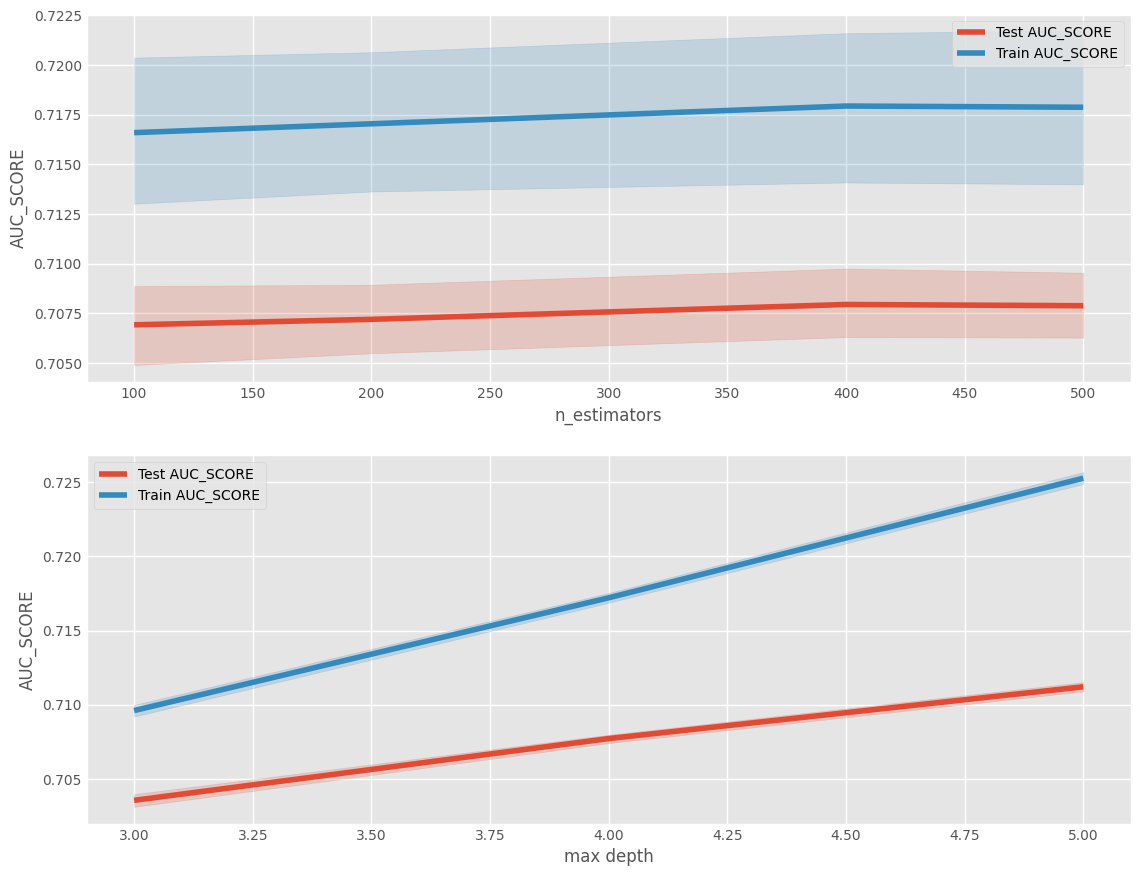

In [285]:

# plotting the test and train score on various paramters values.
# to see whether our model is generalized or not.i.e there should be no overfitting.
plt.style.use("ggplot")
plt.figure(figsize=(12,10))
plt.subplot(2,1,1)
sns.lineplot(x = clf_churn.cv_results_['param_n_estimators'],y=clf_churn.cv_results_['mean_test_score'],label = "Test AUC_SCORE")
sns.lineplot(x = clf_churn.cv_results_['param_n_estimators'],y=clf_churn.cv_results_['mean_train_score'],label = "Train AUC_SCORE")
plt.xlabel("n_estimators")
plt.ylabel("AUC_SCORE")
plt.legend()

plt.subplot(2,1,2)
sns.lineplot(x = clf_churn.cv_results_['param_max_depth'],y=clf_churn.cv_results_['mean_test_score'],label = "Test AUC_SCORE")
sns.lineplot(x = clf_churn.cv_results_['param_max_depth'],y=clf_churn.cv_results_['mean_train_score'],label = "Train AUC_SCORE")
plt.xlabel("max depth")
plt.ylabel("AUC_SCORE")
plt.legend()
plt.show()